In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


# Rose dataset

## 1.1- Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_rose=pd.read_csv('Rose.csv')
df_rose

YearMonth   Rose
0     1980-01  112.0
1     1980-02  118.0
2     1980-03  129.0
3     1980-04   99.0
4     1980-05  116.0
..        ...    ...
182   1995-03   45.0
183   1995-04   52.0
184   1995-05   28.0
185   1995-06   40.0
186   1995-07   62.0

[187 rows x 2 columns]

### Creating timestamps and adding to Dataframe to make it a time series data

In [3]:
date = pd.date_range(start = '1/1/1980', end = '8/1/1995', freq = 'M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding timestamp to dataframe
df_rose['Time_stamp']=pd.DataFrame(date)
df_rose

YearMonth   Rose Time_stamp
0     1980-01  112.0 1980-01-31
1     1980-02  118.0 1980-02-29
2     1980-03  129.0 1980-03-31
3     1980-04   99.0 1980-04-30
4     1980-05  116.0 1980-05-31
..        ...    ...        ...
182   1995-03   45.0 1995-03-31
183   1995-04   52.0 1995-04-30
184   1995-05   28.0 1995-05-31
185   1995-06   40.0 1995-06-30
186   1995-07   62.0 1995-07-31

[187 rows x 3 columns]

In [5]:
df_rose.set_index('Time_stamp',inplace=True)
df_rose.drop(['YearMonth'],axis=1,inplace=True)
df_rose.head()

Rose
Time_stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [6]:
df_rose.dtypes

Rose    float64
dtype: object

### Checking for null values

In [7]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [8]:
df_rose[df_rose['Rose'].isna()]

Rose
Time_stamp      
1994-07-31   NaN
1994-08-31   NaN

### Plotting the timeseries data

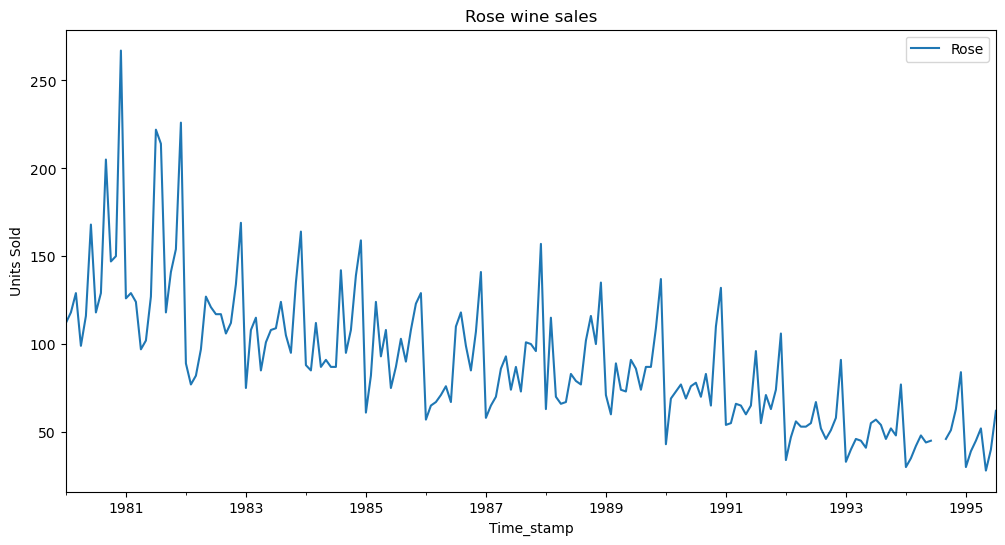

In [9]:
from pylab import rcParams

rcParams['figure.figsize']=12,6
df_rose.plot()
plt.ylabel('Units Sold')
plt.title('Rose wine sales')
plt.show()

In [10]:
### Imputing null values
df_rose=df_rose.interpolate(method='polynomial',order=2)

In [11]:
df_rose.isnull().sum()

Rose    0
dtype: int64

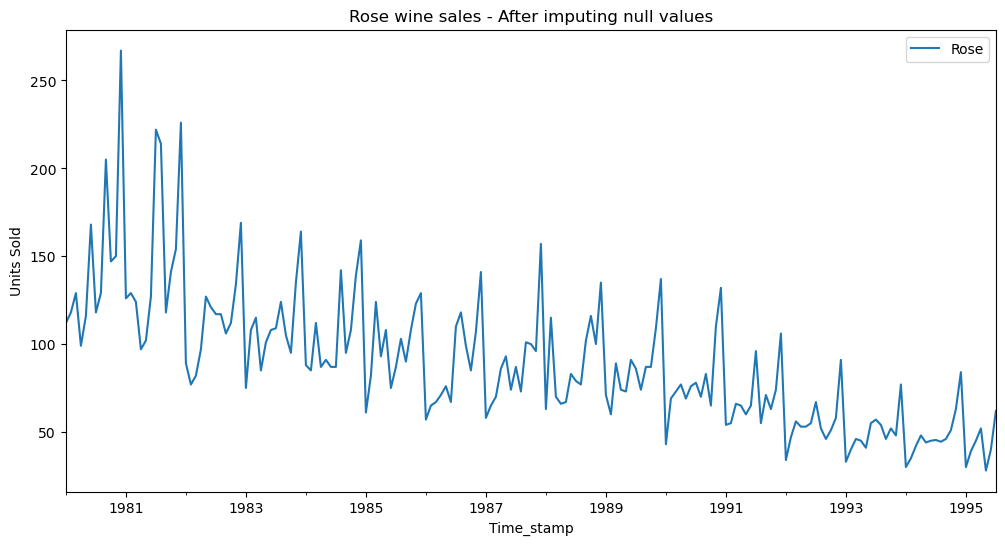

In [12]:
rcParams['figure.figsize']=12,6
df_rose.plot()
plt.ylabel('Units Sold')
plt.title('Rose wine sales - After imputing null values')
plt.show()

## 1.2- Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Exploratory Data Analysis 

In [13]:
df_rose.describe()

Rose
count  187.000000
mean    89.908161
std     39.245545
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

### Yearly Boxplot

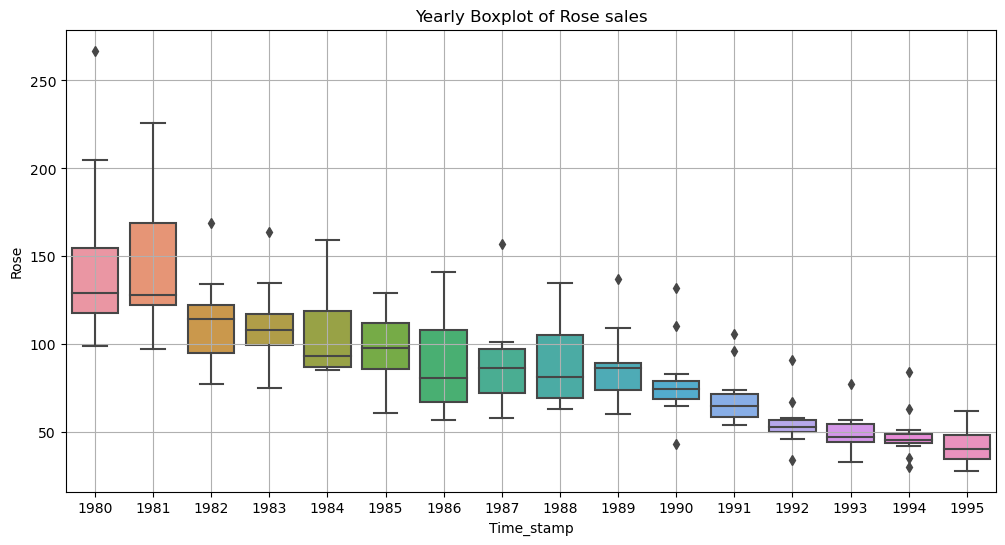

In [14]:
sns.boxplot(x=df_rose.index.year, y=df_rose['Rose'] )
plt.title('Yearly Boxplot of Rose sales')
plt.grid()
plt.show()

### Monthly Boxplot

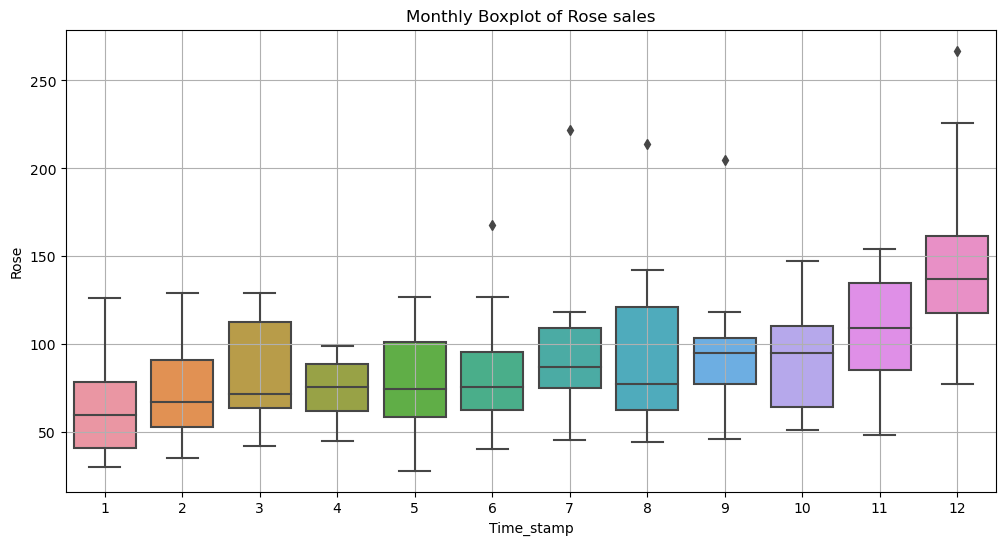

In [15]:
sns.boxplot(x=df_rose.index.month, y=df_rose['Rose'] )
plt.title('Monthly Boxplot of Rose sales')
plt.grid()
plt.show()

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

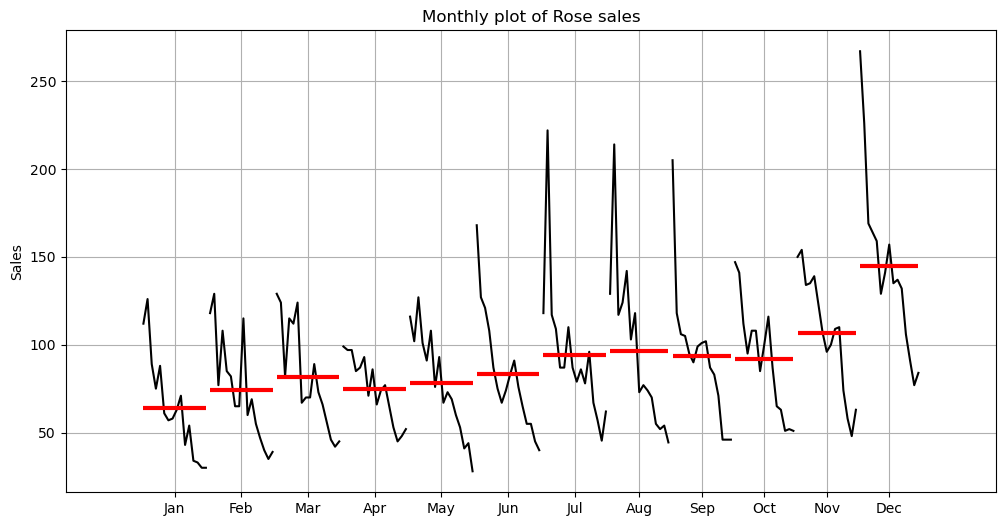

In [175]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_rose['Rose'],ylabel='Sales')
plt.title('Monthly plot of Rose sales')
plt.grid()

### Plot of montly wine sales across years

In [17]:
monthly_sales_across_years = pd.pivot_table(df_rose, values='Rose', columns=df_rose.index.month, index=df_rose.index.year)
monthly_sales_across_years.style.highlight_max()

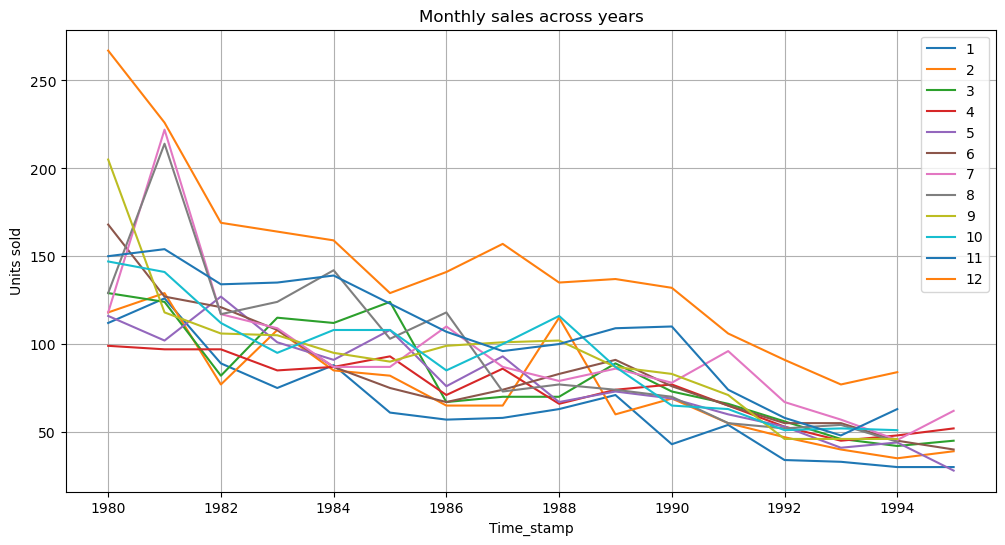

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.ylabel('Units sold')
plt.title('Monthly sales across years')
plt.legend(loc='best')

### Plot of average wine sales per month and % change of sales over time

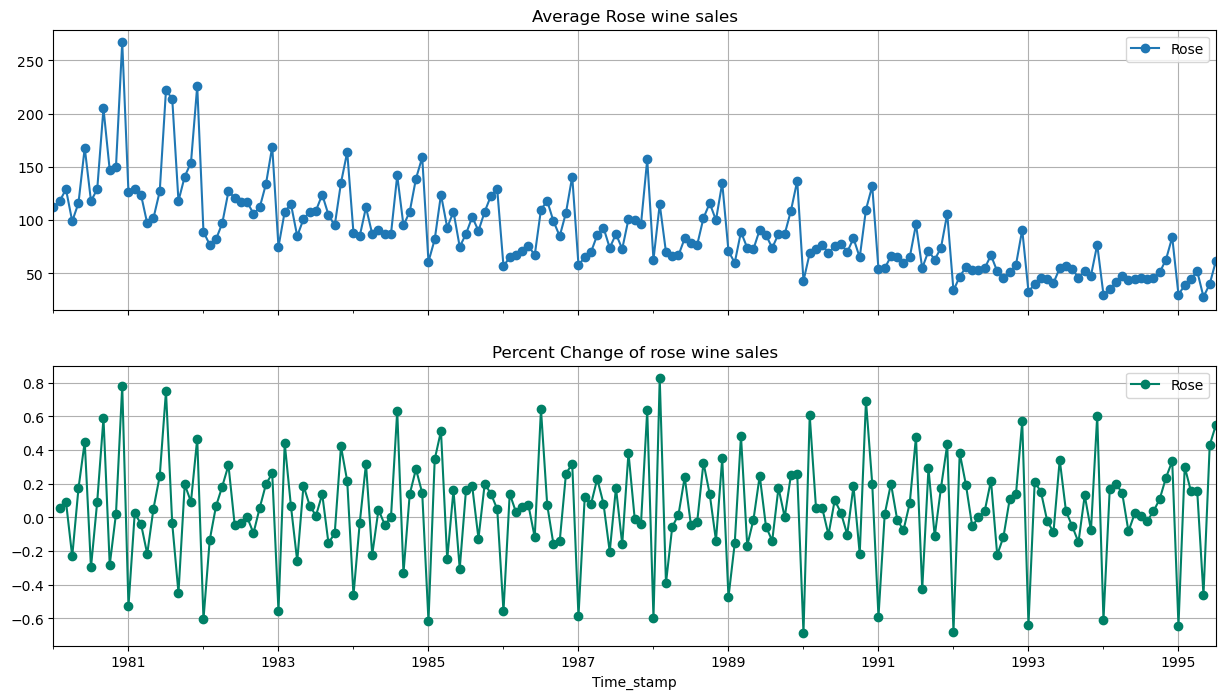

In [19]:
average_rose = df_rose.groupby(df_rose.index)['Rose'].mean()
pct_change_rose = df_rose.groupby(df_rose.index)['Rose'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rose wine sales over time(year-month)
ax1=average_rose.plot(legend=True, ax=axis1, marker='o', title='Average Rose wine sales', grid=True)

# plot precent change for Rose wine Sales over time(year-month)
ax2 = pct_change_rose.plot(legend=True, ax=axis2, marker='o', colormap="summer",title="Percent Change of rose wine sales",grid=True)
plt.legend(loc='best')
plt.show();

### Decompose time series and plot the different components

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

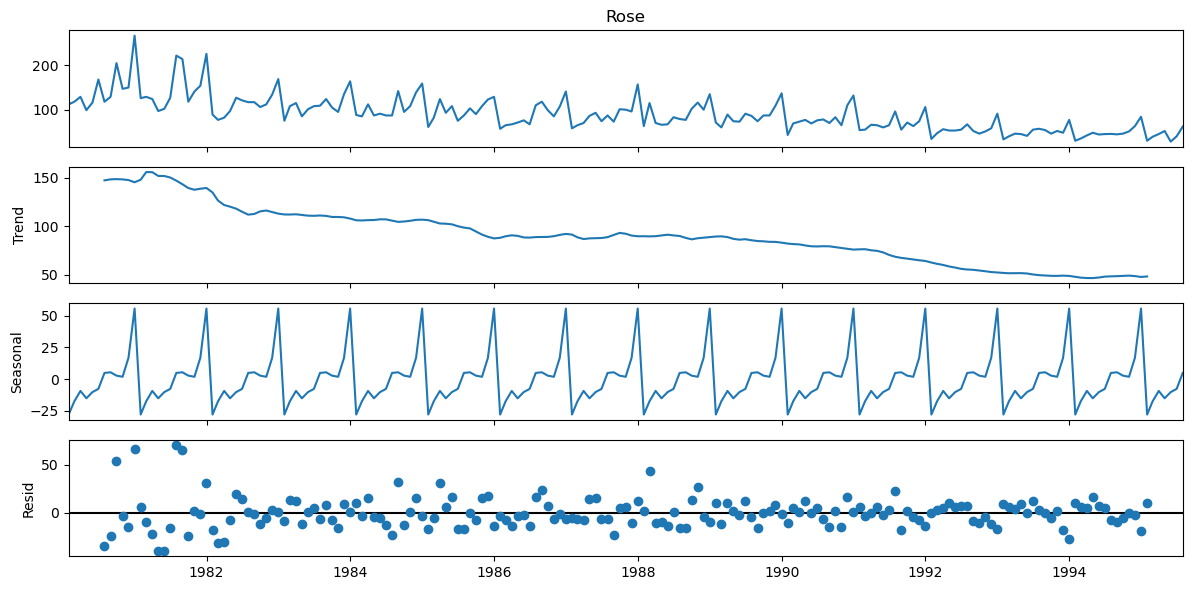

In [21]:
decomposition_add = seasonal_decompose(df_rose['Rose'], model='additive')
decomposition_add.plot();

In [26]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_stamp
1980-01-31   -27.902010
1980-02-29   -17.432240
1980-03-31    -9.278727
1980-04-30   -15.091227
1980-05-31   -10.189441
1980-06-30    -7.671584
1980-07-31     4.908409
1980-08-31     5.423195
1980-09-30     2.781323
1980-10-31     1.878545
1980-11-30    16.853545
1980-12-31    55.720212
Name: seasonal, dtype: float64 

Residual 
 Time_stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.991742
1980-08-31   -24.548195
1980-09-30    53.843677
1980-10-31    -2.961879
1980-11-30   -14.270212
1980-12-31    66.15

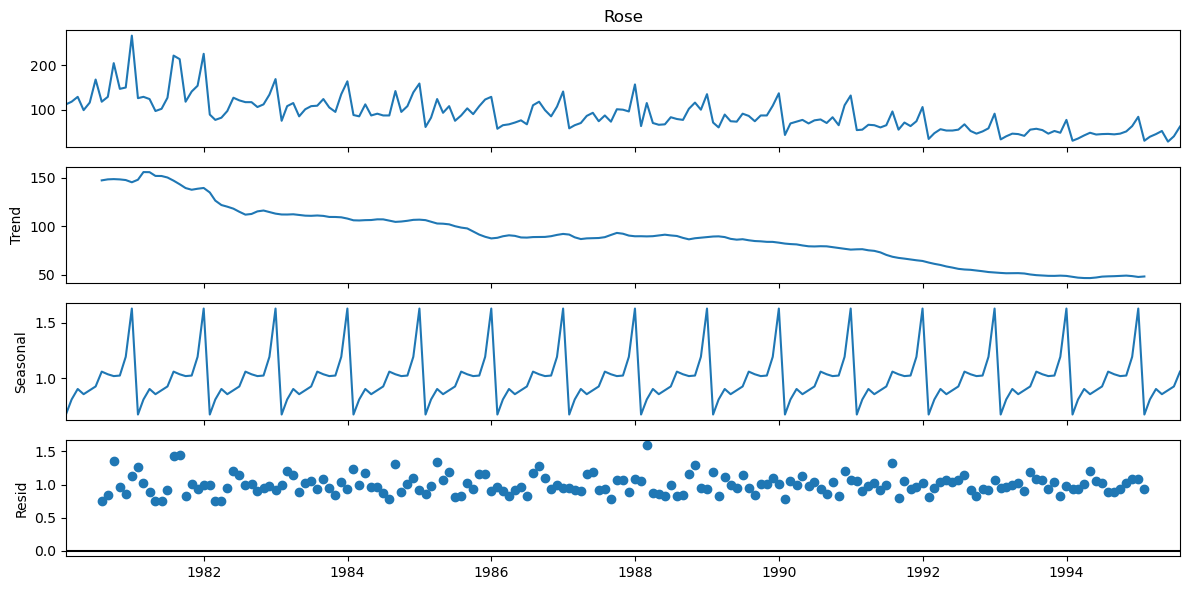

In [27]:
decomposition_mul = seasonal_decompose(df_rose['Rose'], model='multiplicative')
decomposition_mul.plot();

In [29]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_stamp
1980-01-31    0.670195
1980-02-29    0.806214
1980-03-31    0.901299
1980-04-30    0.854178
1980-05-31    0.889553
1980-06-30    0.924121
1980-07-31    1.058265
1980-08-31    1.034285
1980-09-30    1.017773
1980-10-31    1.022710
1980-11-30    1.192521
1980-12-31    1.628885
Name: seasonal, dtype: float64 

Residual 
 Time_stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758096
1980-08-31    0.842017
1980-09-30    1.357507
1980-10-31    0.970641
1980-11-30    0.853254
1980-12-31    1.129480
Name: resid, dtype:

## 1.3- Split the data into training and test. The test data should start in 1991.

### Splitting the data into train and test

In [30]:
train = df_rose[df_rose.index.year < 1991]
test = df_rose[df_rose.index.year >= 1991]

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(train.tail())

First few rows of Training Data


Rose
Time_stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [32]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


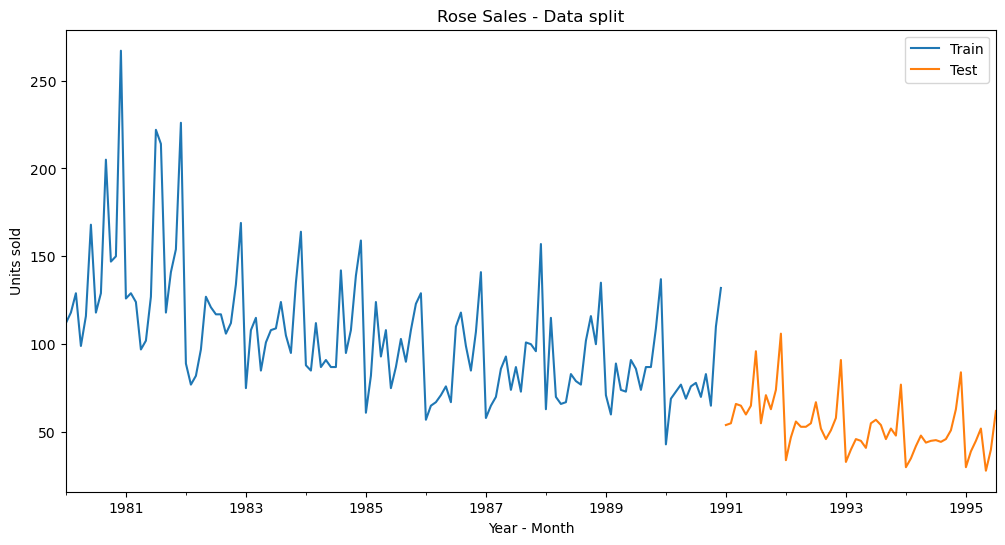

In [33]:
train['Rose'].plot(label = 'Train')
test['Rose'].plot(label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split')
plt.show;

## 1.4- Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

The following models will be conducted-:
- Model 1: Linear Regression
- Model 2: Naive method
- Model 3: Simple average
- Model 4: Moving Average
- Model 5: Simple exponential smoothing
- Model 6: Double exponential smoothing (Holt's method)
- Model 7: Triple exponential smoothing (Holt-Winter's method)

### Model 1: Linear Regression

#### In linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [34]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training time instance','\n',train_time)
print('Test time instance','\n',test_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [35]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [36]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



**Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.**

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Rose'].values)

LinearRegression()

In [39]:
test_predict_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOntime'] = test_predict_model1

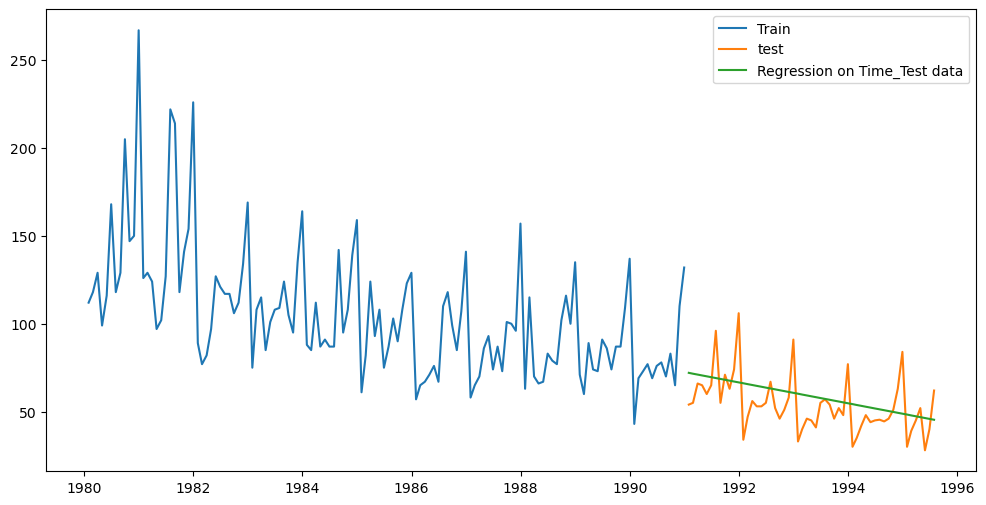

In [40]:
plt.plot(train['Rose'],label='Train')
plt.plot(test['Rose'],label='test')
plt.plot(LinearRegression_test['RegOntime'], label='Regression on Time_Test data')
plt.legend(loc='best')
plt.show()

In [41]:
# Defining accuracy matrix
from sklearn import metrics

#### Model Evaluation

In [42]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predict_model1, squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.28


In [43]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE
RegressionOnTime  15.276993

### Model 2: Naive method

In [44]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [45]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

Time_stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

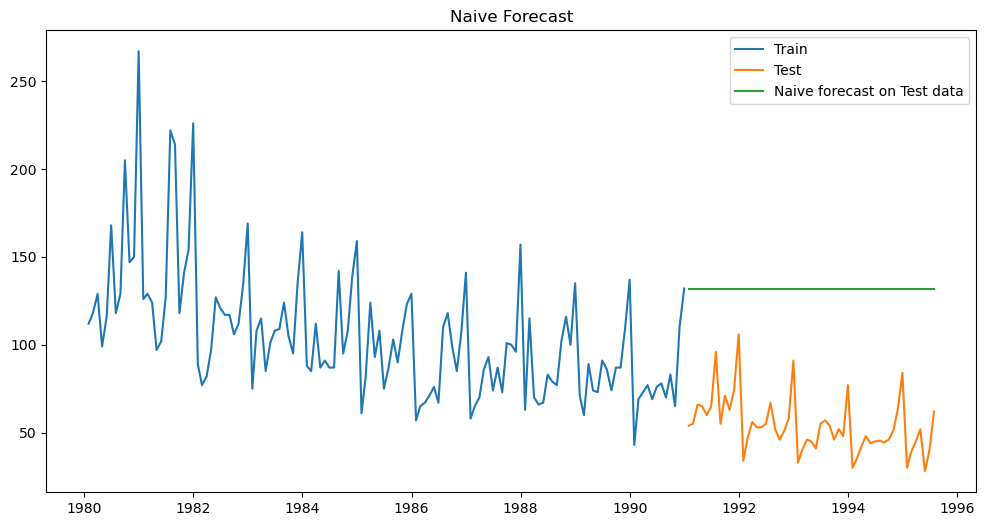

In [46]:
plt.plot(NaiveModel_train['Rose'], label = 'Train')
plt.plot(test['Rose'], label = 'Test')
plt.plot(NaiveModel_test['rose_naive'], label= 'Naive forecast on Test data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

#### Model Evaluation

In [47]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'], squared=False)
print("For Naive forecast on Test Data,  RMSE is %3.2f" %(rmse_model2_test))                                              

For Naive forecast on Test Data,  RMSE is 79.74


In [48]:
rose_resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
rose_resultsDf_2 

Test RMSE
Naive Model  79.742058

In [49]:
rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_2])
rose_resultsDf

Test RMSE
RegressionOnTime  15.276993
Naive Model       79.742058

### Model 3: Simple Average

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

Time_stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

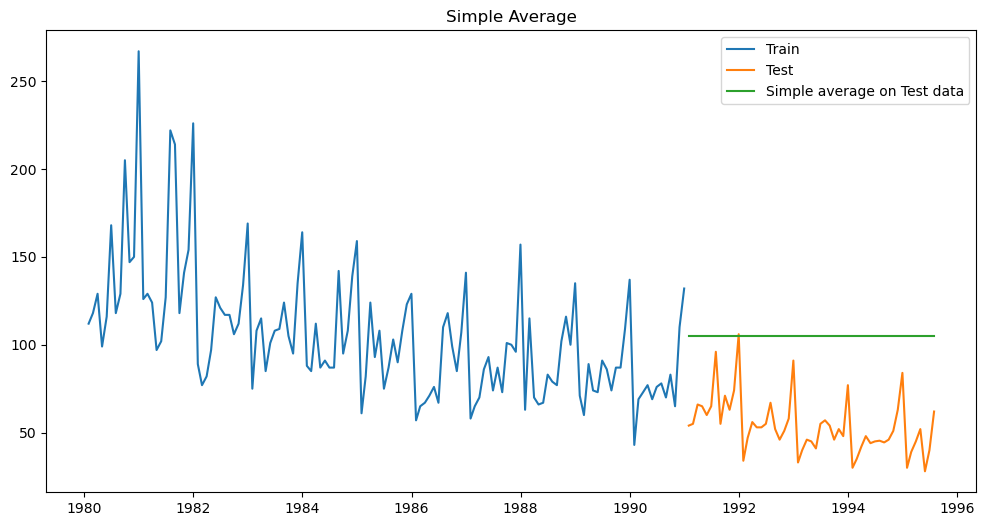

In [53]:
plt.plot(SimpleAverage_train['Rose'], label = 'Train')
plt.plot(SimpleAverage_test['Rose'], label = 'Test')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label= 'Simple average on Test data')
plt.legend(loc='best')
plt.title('Simple Average')
plt.show()

#### Model Evaluation

In [54]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'], squared=False)
print("For Simple average on Test Data,  RMSE is %3.2f" %(rmse_model3_test))                                              

For Simple average on Test Data,  RMSE is 53.48


In [55]:
rose_resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average model'])
rose_resultsDf_3 

Test RMSE
Simple Average model  53.484487

In [56]:
rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_3])

In [57]:
rose_resultsDf.drop_duplicates()

Test RMSE
RegressionOnTime      15.276993
Naive Model           79.742058
Simple Average model  53.484487

### Model 4: Moving Average

In [58]:
MovingAverage = df_rose.copy()
MovingAverage.head()

Rose
Time_stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [59]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Rose_Trailing_2  Rose_Trailing_4  Rose_Trailing_6  \
Time_stamp                                                             
1980-01-31  112.0              NaN              NaN              NaN   
1980-02-29  118.0            115.0              NaN              NaN   
1980-03-31  129.0            123.5              NaN              NaN   
1980-04-30   99.0            114.0            114.5              NaN   
1980-05-31  116.0            107.5            115.5              NaN   

            Rose_Trailing_9  
Time_stamp                   
1980-01-31              NaN  
1980-02-29              NaN  
1980-03-31              NaN  
1980-04-30              NaN  
1980-05-31              NaN

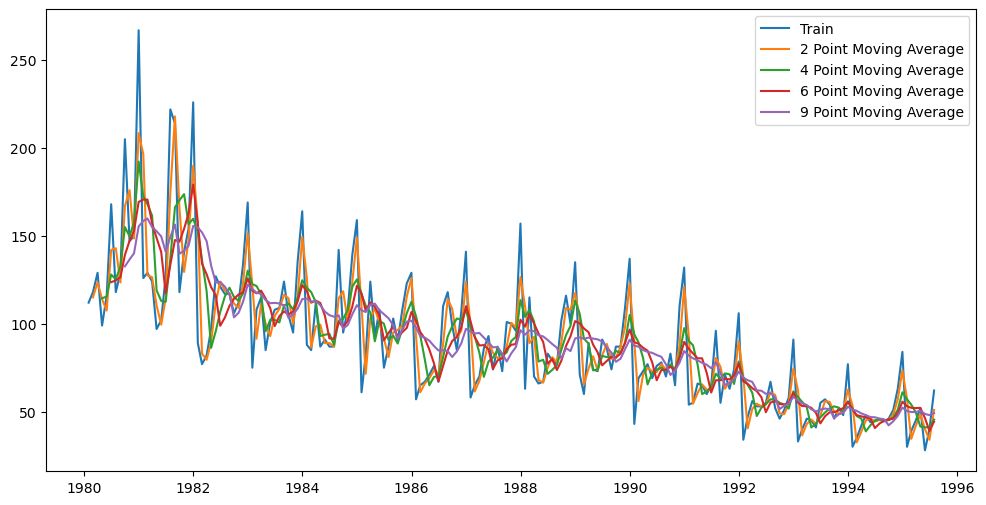

In [60]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.show()

In [61]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

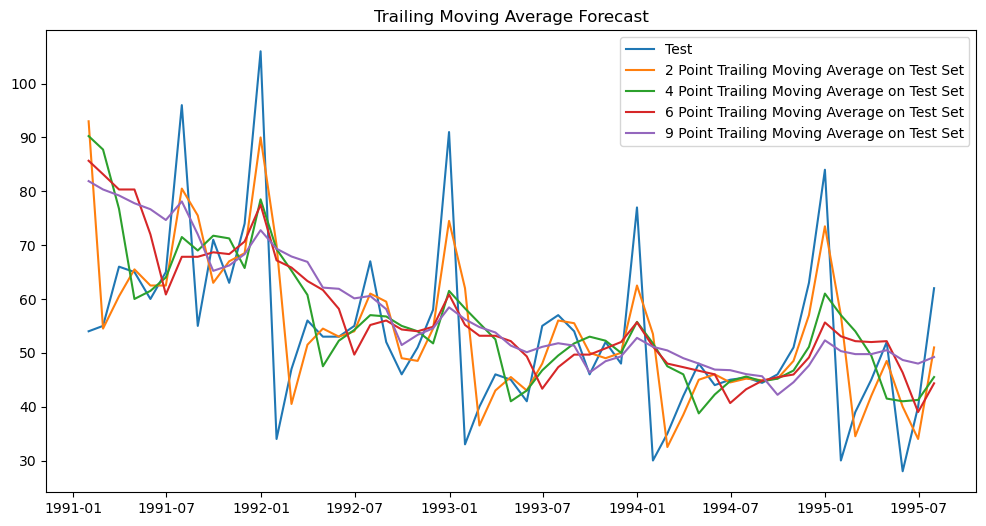

In [62]:
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Trailing Moving Average Forecast");

#### Model evaluation

In [63]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.53
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.46
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.57
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.73 


In [64]:
rose_resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA','6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_4])
rose_resultsDf

Test RMSE
RegressionOnTime      15.276993
Naive Model           79.742058
Simple Average model  53.484487
2 point TMA           11.529929
4 point TMA           14.457533
6 point TMA           14.571867
9 point TMA           14.732128

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

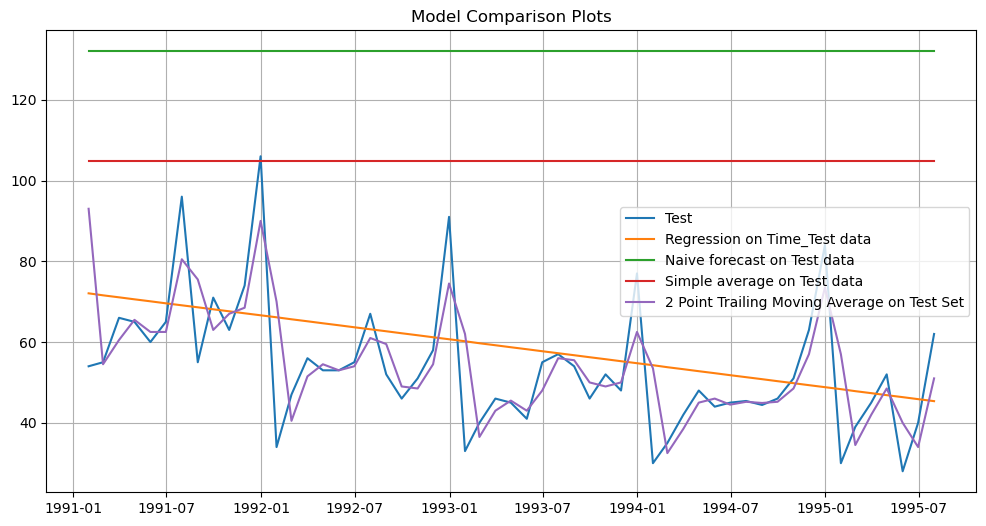

In [66]:
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOntime'], label='Regression on Time_Test data')

plt.plot(NaiveModel_test['rose_naive'], label= 'Naive forecast on Test data')

plt.plot(SimpleAverage_test['rose_mean_forecast'], label= 'Simple average on Test data')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [68]:
SES_train = train.copy()
SES_test = test.copy()

In [69]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [70]:
model_SES_autofit = model_SES.fit(optimized=True)

In [71]:
model_SES_autofit.params

{'smoothing_level': 0.12362013444181875,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
SES_test['predict']=model_SES_autofit.forecast(steps = len(test))
SES_test.head()

Rose    predict
Time_stamp                 
1991-01-31  54.0  87.983765
1991-02-28  55.0  87.983765
1991-03-31  66.0  87.983765
1991-04-30  65.0  87.983765
1991-05-31  60.0  87.983765

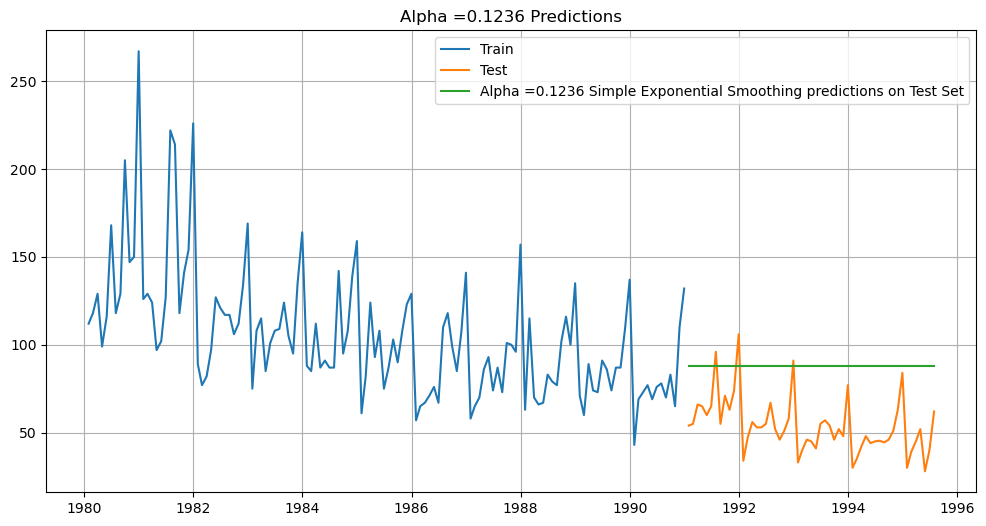

In [73]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.1236 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1236 Predictions');

### Model Evaluation for $\alpha$ = 0.0987 : SES-Autofit Model:

In [74]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.1236 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 37.617


In [75]:
rose_resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.1236 ,SimpleExponentialSmoothing'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_5])
rose_resultsDf

Test RMSE
RegressionOnTime                          15.276993
Naive Model                               79.742058
Simple Average model                      53.484487
2 point TMA                               11.529929
4 point TMA                               14.457533
6 point TMA                               14.571867
9 point TMA                               14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing  37.616598

#### Setting different aplha values

- We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [77]:
rose_resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
rose_resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [172]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Rose']))
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    rose_resultsDf_6 = rose_resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\3028746093.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rose_resultsDf_6 = rose_resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\3028746093.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rose_resultsDf_6 = rose_resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\3028746093.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rose_resultsDf_6 = rose_resultsDf_6.append({'Alpha Values':i,'Train RMSE':r

#### Model evaluation based on iterations

In [79]:
rose_resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.852435
1           0.2   31.979391  41.386161
2           0.3   32.470164  47.528919
3           0.4   33.035130  53.791314
4           0.5   33.682839  59.665528
5           0.6   34.441171  64.994892
6           0.7   35.323261  69.721655
7           0.8   36.334596  73.797396
8           0.9   37.482782  77.162611

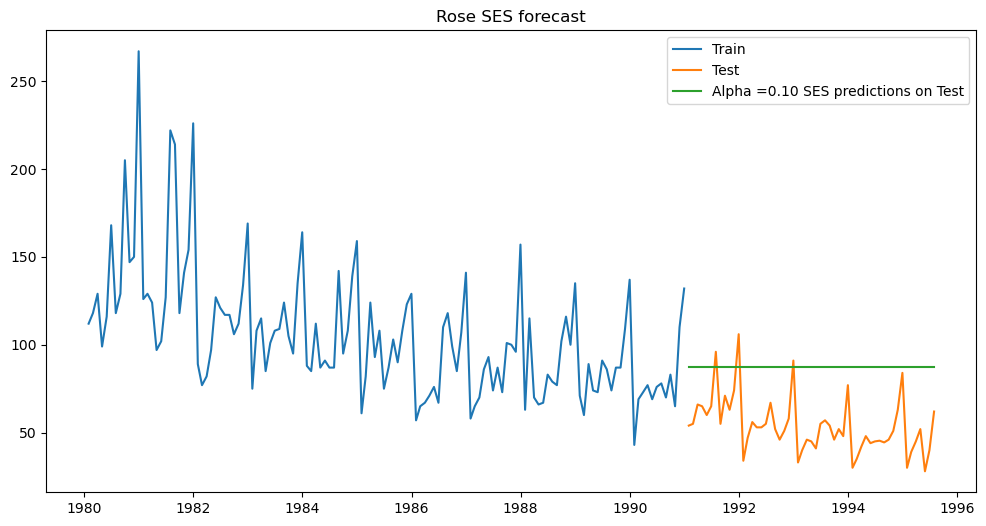

In [80]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.10], label='Alpha =0.10 SES predictions on Test')
plt.title('Rose SES forecast')
plt.legend(loc='best')
plt.show();

In [81]:
rose_resultsDf_6 = pd.DataFrame({'Test RMSE': [rose_resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.10,SES_Iterative'])
rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_6])
rose_resultsDf

Test RMSE
RegressionOnTime                          15.276993
Naive Model                               79.742058
Simple Average model                      53.484487
2 point TMA                               11.529929
4 point TMA                               14.457533
6 point TMA                               14.571867
9 point TMA                               14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing  37.616598
Alpha=0.10,SES_Iterative                  36.852435

### Model 5: Double Exponential Smoothing (Holt's method)

In [83]:
DES_train = train.copy()
DES_test = test.copy()

In [84]:
model_DES = Holt(DES_train['Rose'])

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


### Autofit model

In [85]:
model_DES_autofit = model_DES.fit(optimized=True)

In [86]:
model_DES_autofit.params

{'smoothing_level': 0.16213318268706903,
 'smoothing_trend': 0.13152160115452238,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.16213318268706903
0.13152160115452238


In [88]:
DES_test['predict',alpha,beta] = model_DES_autofit.forecast(len(test['Rose']))
DES_test.head()

Rose  (predict, 0.16213318268706903, 0.13152160115452238)
Time_stamp                                                           
1991-01-31  54.0                                          87.249990  
1991-02-28  55.0                                          88.152720  
1991-03-31  66.0                                          89.055449  
1991-04-30  65.0                                          89.958179  
1991-05-31  60.0                                          90.860908

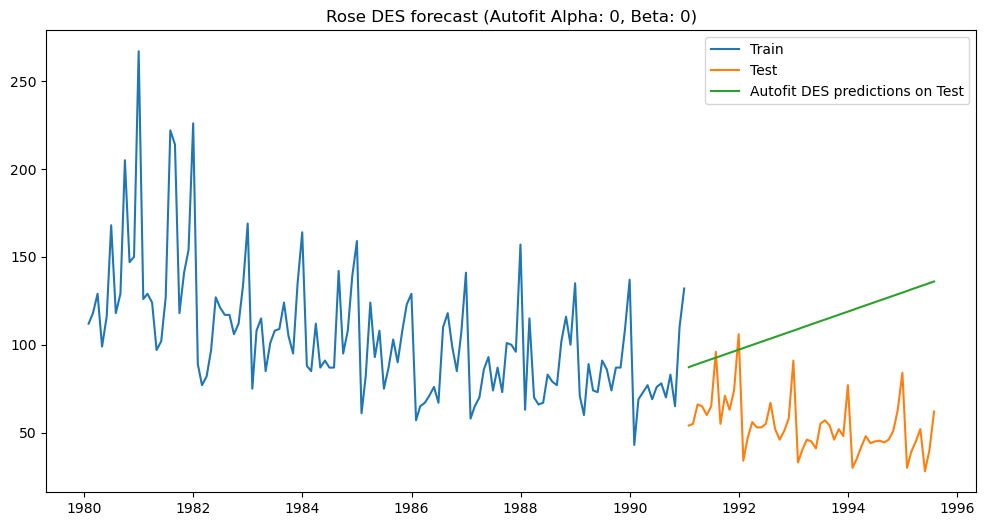

In [89]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict',alpha,beta], label='Autofit DES predictions on Test')
plt.title('Rose DES forecast (Autofit Alpha: 0, Beta: 0)')
plt.legend(loc='best')
plt.show();

### Model Evaluation for $\alpha$ = 0.0 and $\beta$ = 0.0 : DES-Autofit Model:

In [90]:
rmse_DES = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 63.070


In [91]:
rose_resultsDf_7= pd.DataFrame({'Test RMSE': [rmse_DES]},index=['Alpha=0.0,Beta=0.0, DES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_7])
rose_resultsDf

Test RMSE
RegressionOnTime                          15.276993
Naive Model                               79.742058
Simple Average model                      53.484487
2 point TMA                               11.529929
4 point TMA                               14.457533
6 point TMA                               14.571867
9 point TMA                               14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing  37.616598
Alpha=0.10,SES_Iterative                  36.852435
Alpha=0.0,Beta=0.0, DES Optimized         63.070429

### Iterative Method for Double Exponential Smoothing

In [93]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [94]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644332449.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\1644

In [95]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1       34.44      36.95
1            0.1          0.2       33.45      48.72
10           0.2          0.1       33.10      65.76
2            0.1          0.3       33.15      78.19
20           0.3          0.1       33.61      98.68

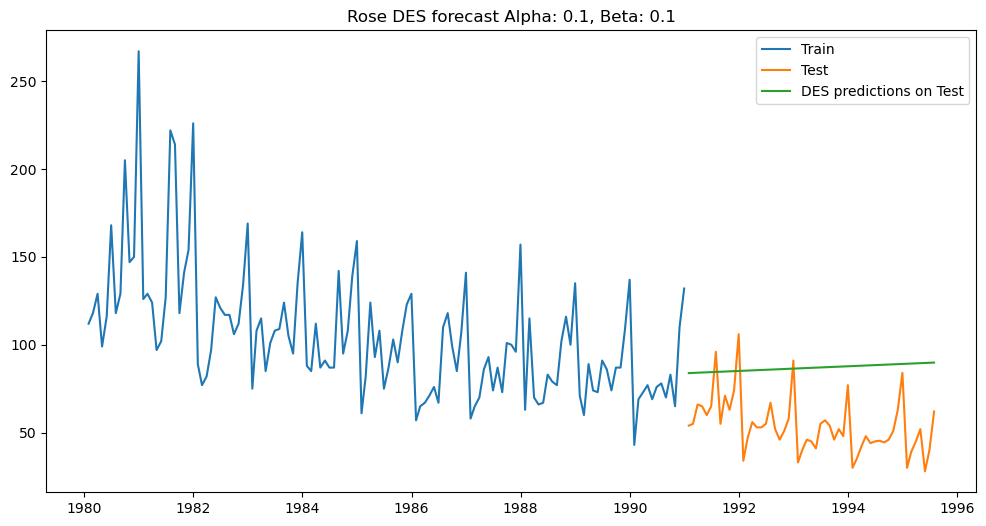

In [96]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='DES predictions on Test')
plt.title('Rose DES forecast Alpha: 0.1, Beta: 0.1')
plt.legend(loc='best')
plt.show();

In [97]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_1])
rose_resultsDf

Test RMSE
RegressionOnTime                          15.276993
Naive Model                               79.742058
Simple Average model                      53.484487
2 point TMA                               11.529929
4 point TMA                               14.457533
6 point TMA                               14.571867
9 point TMA                               14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing  37.616598
Alpha=0.10,SES_Iterative                  36.852435
Alpha=0.0,Beta=0.0, DES Optimized         63.070429
Alpha=0.1,Beta=0.1,DES_Iterative          36.950000

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [99]:
TES_train = train.copy()
TES_test = test.copy()

In [174]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [101]:
resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [102]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.app

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.app

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.app

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\9959277.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [103]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE  Gamma Values
112           0.2          0.5   23.656276   9.881358           0.3
8             0.1          0.2   20.871304   9.895094           0.3
177           0.3          0.3   24.588120  10.155534           0.4
185           0.3          0.4   25.599445  10.357938           0.4
9             0.1          0.2   21.613205  10.379082           0.4

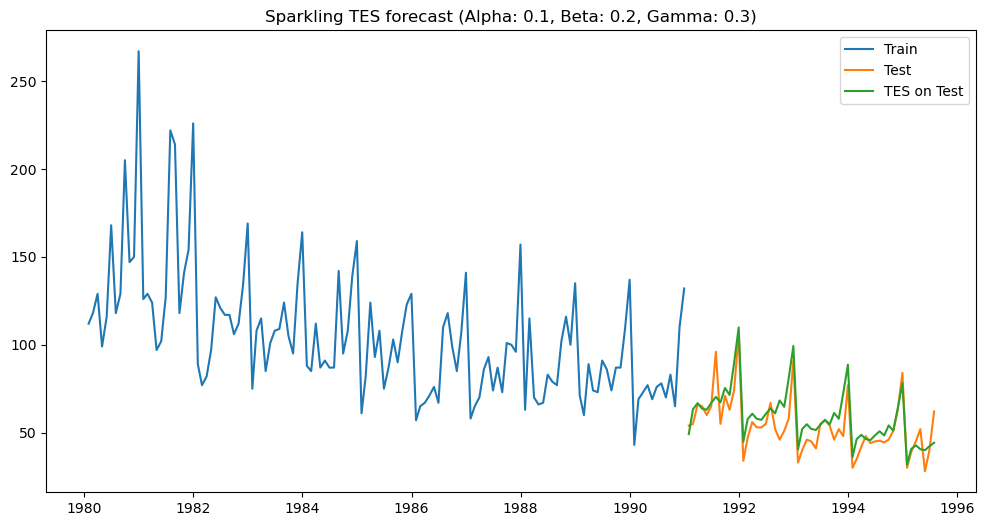

In [104]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict', 0.1, 0.2, 0.3],label='TES on Test')
plt.title('Sparkling TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.3)')
plt.legend(loc='best')
plt.show()

In [105]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_1])
rose_resultsDf

Test RMSE
RegressionOnTime                            15.276993
Naive Model                                 79.742058
Simple Average model                        53.484487
2 point TMA                                 11.529929
4 point TMA                                 14.457533
6 point TMA                                 14.571867
9 point TMA                                 14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing    37.616598
Alpha=0.10,SES_Iterative                    36.852435
Alpha=0.0,Beta=0.0, DES Optimized           63.070429
Alpha=0.1,Beta=0.1,DES_Iterative            36.950000
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative   9.881358

## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [107]:
# Dickey-Fuller test to check for stationarity of time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, colour):
    # determining rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='observed')
    mean = plt.plot(rolmean, color='red',label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Result of Dickey-Fuller test: ' )
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

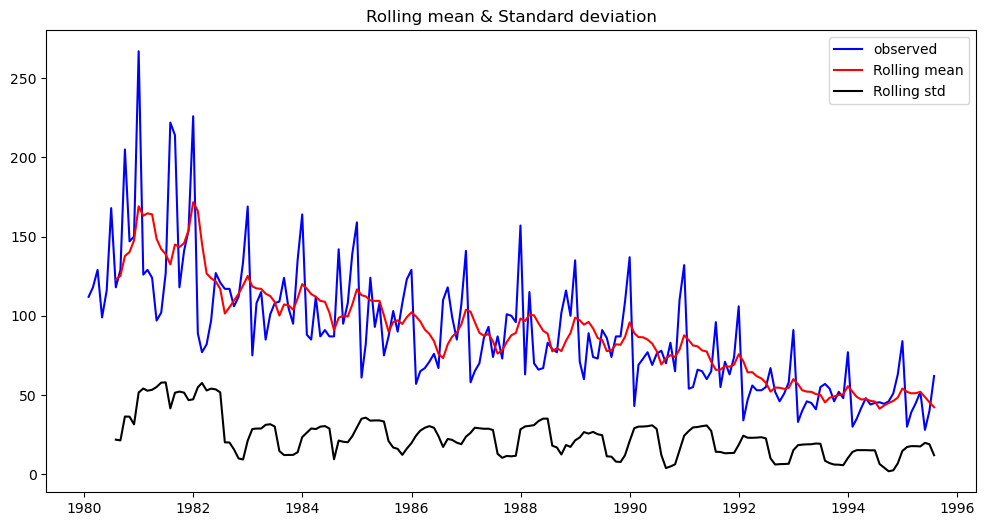

Result of Dickey-Fuller test: 
Test Statistic                  -1.873015
p-value                          0.344860
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [108]:
test_stationarity(df_rose['Rose'],'Violet')

- We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

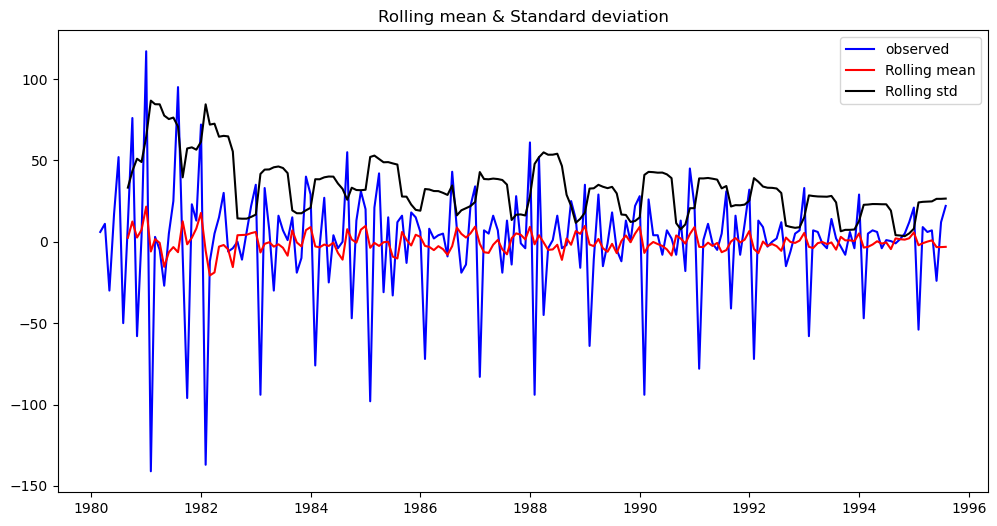

Result of Dickey-Fuller test: 
Test Statistic                -8.044130e+00
p-value                        1.813672e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [109]:
test_stationarity(df_rose['Rose'].diff().dropna(),'Violet')

The time series is now stationary

### Plot the Autocorrelation function plots on the whole data.

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF

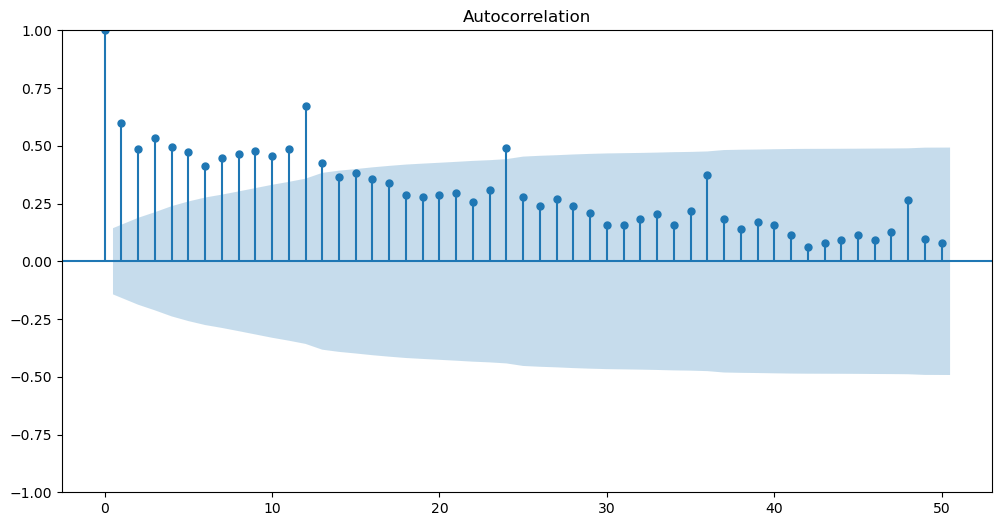

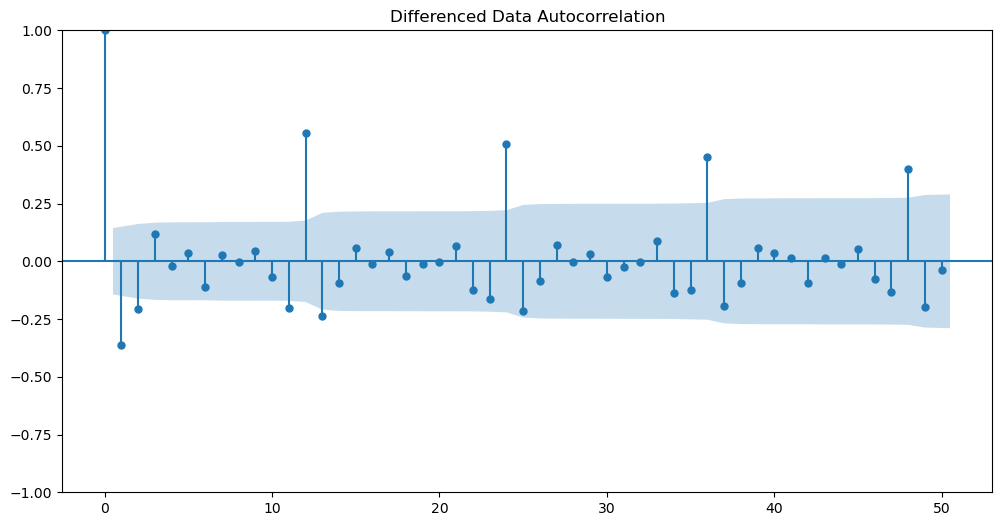

In [111]:
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF

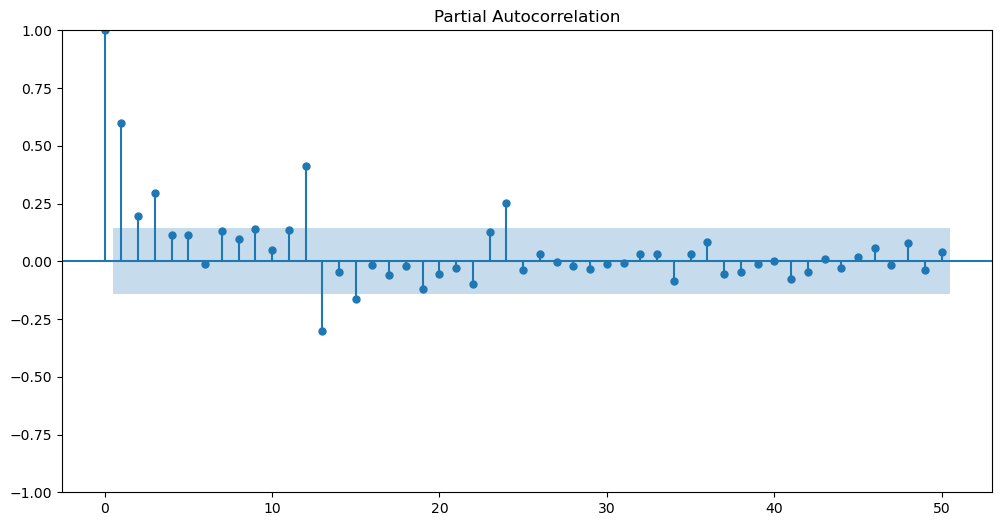

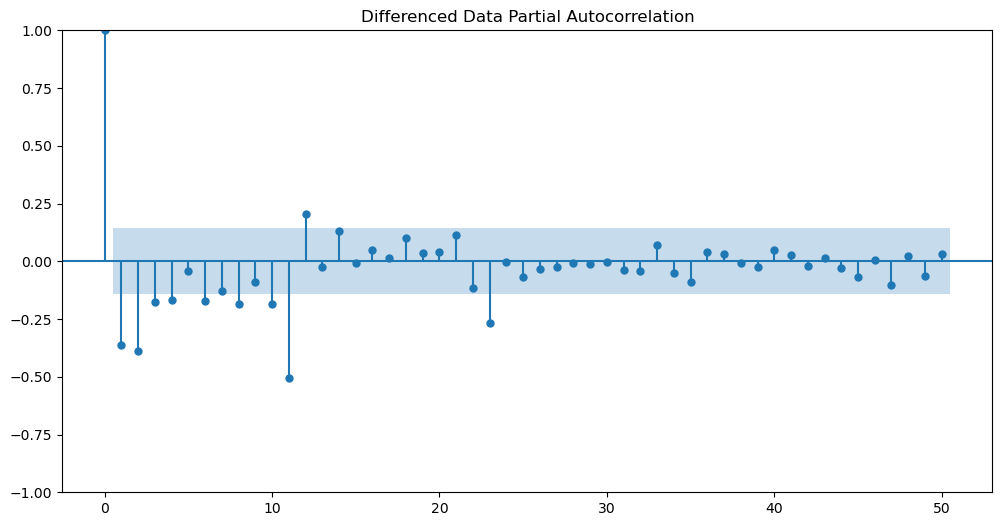

In [112]:
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## 1.6-Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto ARIMA

In [113]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [117]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [118]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The fr

ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.5078621868474


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1281.8707222264284


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)


In [119]:
ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [120]:
#(0, 1, 2) AIC=1276.835382
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Thu, 07 Dec 2023   AIC                           1279.672
Time:                        16:19:43   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Rose']))

In [125]:
rmse_arima_auto_model = metrics.mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 37.331


In [126]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]},index=['Auto_ARIMA(0, 1, 2)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_9])
rose_resultsDf

Test RMSE
RegressionOnTime                            15.276993
Naive Model                                 79.742058
Simple Average model                        53.484487
2 point TMA                                 11.529929
4 point TMA                                 14.457533
6 point TMA                                 14.571867
9 point TMA                                 14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing    37.616598
Alpha=0.10,SES_Iterative                    36.852435
Alpha=0.0,Beta=0.0, DES Optimized           63.070429
Alpha=0.1,Beta=0.1,DES_Iterative            36.950000
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative   9.881358
Auto_ARIMA(0, 1, 2)                         37.330772

### AUTO SARIMA

In [127]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

From ACF and PACF plots We can see that there is a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

In [128]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [129]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [130]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301621102


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776011
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601602


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654557


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729143626


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244224324


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133562965


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717622


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809265958


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.245665553056


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520081


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670283402


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158657


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555752762065


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715169046


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1098.659802429431


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:904.500348847244


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:784.0140955703747


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:941.5256923362776


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:915.2731134090519


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8237144294075


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:811.5489438178313


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:805.1158488730595


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:774.969119413977
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.5103013842067


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887547028


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:828.8398832821147
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.9698535736659


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934823588


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:830.3075804966921


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:826.9995808091124


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:823.8261102784139


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:825.0437253107219


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1110.6209464400522


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:914.0453844988109


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:792.3411370856618


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:933.29742168237


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:927.2920638200445


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:794.192970668376


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:799.9474258321094


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:791.9065436332497


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:783.8990981935275


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1096.35710248549


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:906.4966907624965


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:785.983273877574


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:934.8870392438203


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:917.2527818407


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:787.7843970226854


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:801.9382052143947


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:791.9171138892203


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9401641656649
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1133.246770439664


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:949.5332566878958


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:827.1933387102495


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:950.2637728229208


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:952.2623518887143


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:828.7198704732897


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:814.2969261794995


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:808.5100914925548


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:810.0074804178729


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1107.1166362359006


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:915.1236479113414


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:794.2799626276219


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:926.31970362681


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:928.3197020908624


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001391788


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.8940753934021


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928054297368


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335678622736


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964822049


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130514781


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1410300521201


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705668464529


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932524047625


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8287219864782


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442942592


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.7036522745094


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9960994857244


C:\Users\C V S BRAHMMANANDA\AppData\Local\Temp\ipykernel_24620\2262033459.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


In [131]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 1, 2, 12)  774.969119
53  (1, 1, 2)  (2, 1, 2, 12)  776.940164
80  (2, 1, 2)  (2, 1, 2, 12)  776.996099
17  (0, 1, 1)  (2, 1, 2, 12)  782.153872
79  (2, 1, 2)  (2, 1, 1, 12)  783.703652

In [132]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Thu, 07 Dec 2023   AIC                            774.969
Time:                                    16:38:44   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

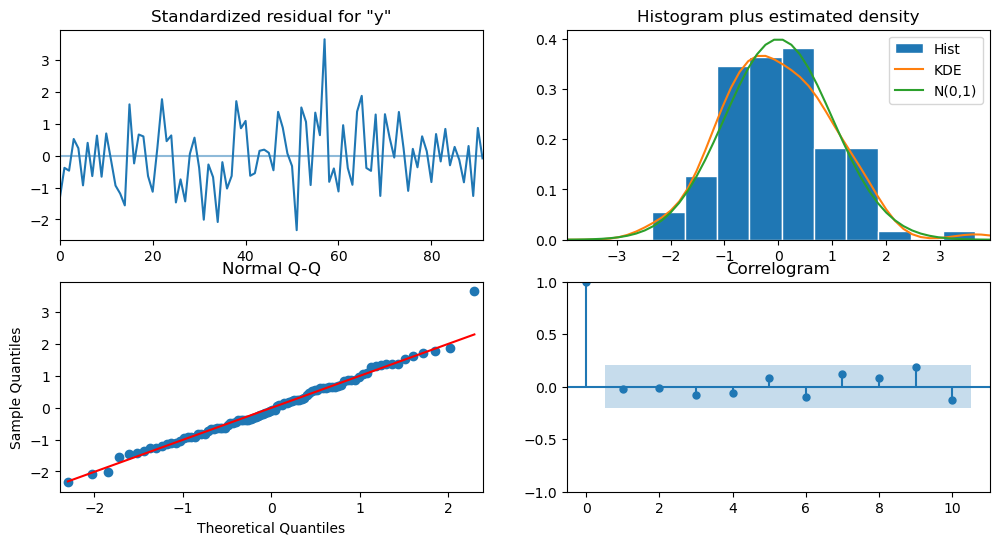

In [133]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [134]:
predicted_auto_SARIMA = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))

In [135]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.213906  14.221757      16.339775      72.088037
1  62.326915  14.300523      34.298404      90.355425
2  67.313577  14.302429      39.281331      95.345823
3  63.161196  14.305335      35.123254      91.199137
4  66.474432  14.310710      38.425957      94.522907

In [136]:
# Extract the predicted and true values of our time series
rose_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['rose_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Rose  rose_forecasted
Time_stamp                       
1991-01-31  54.0        44.213906
1991-02-28  55.0        62.326915
1991-03-31  66.0        67.313577
1991-04-30  65.0        63.161196
1991-05-31  60.0        66.474432

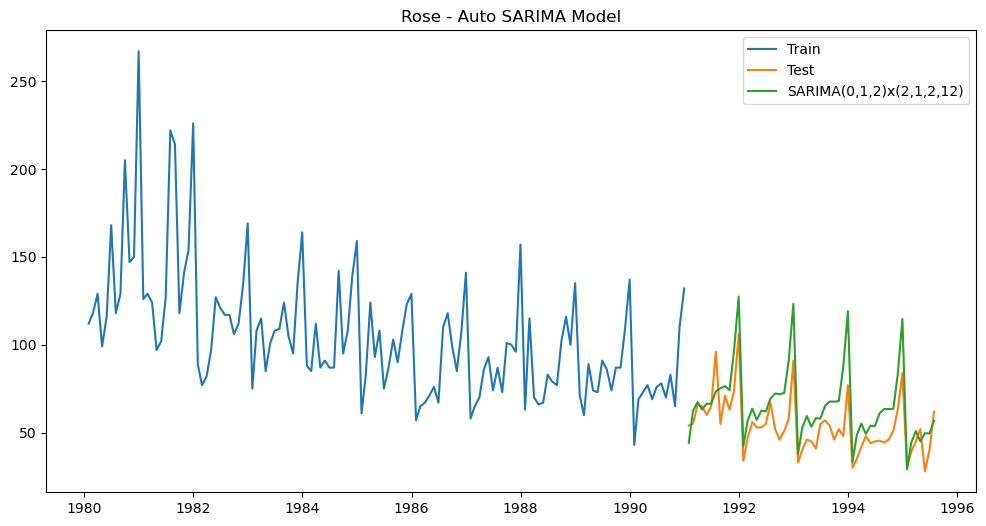

In [137]:
plt.plot(SARIMA_train['Rose'], label='Train')
plt.plot(SARIMA_test['Rose'], label='Test')
plt.plot(SARIMA_test['rose_forecasted'], label='SARIMA(0,1,2)x(2,1,2,12)')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best')
plt.show()

In [138]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 16.524


In [139]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]},index=['Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_10])
rose_resultsDf

Test RMSE
RegressionOnTime                            15.276993
Naive Model                                 79.742058
Simple Average model                        53.484487
2 point TMA                                 11.529929
4 point TMA                                 14.457533
6 point TMA                                 14.571867
9 point TMA                                 14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing    37.616598
Alpha=0.10,SES_Iterative                    36.852435
Alpha=0.0,Beta=0.0, DES Optimized           63.070429
Alpha=0.1,Beta=0.1,DES_Iterative            36.950000
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative   9.881358
Auto_ARIMA(0, 1, 2)                         37.330772
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)          16.524205

## 1.7- Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [140]:
rose_resultsDf

Test RMSE
RegressionOnTime                            15.276993
Naive Model                                 79.742058
Simple Average model                        53.484487
2 point TMA                                 11.529929
4 point TMA                                 14.457533
6 point TMA                                 14.571867
9 point TMA                                 14.732128
Alpha=0.1236 ,SimpleExponentialSmoothing    37.616598
Alpha=0.10,SES_Iterative                    36.852435
Alpha=0.0,Beta=0.0, DES Optimized           63.070429
Alpha=0.1,Beta=0.1,DES_Iterative            36.950000
Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative   9.881358
Auto_ARIMA(0, 1, 2)                         37.330772
Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)          16.524205

## 1.8- Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

i.e-  Alpha=0.1, Beta=0.2, gamma=0.3, TES_Iterative or 2 point TMA

In [142]:
Full_model_TES_rose = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='multiplicative')
Full_model_TES_rose_fit = Full_model_TES_rose.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.3,optimized=True,use_brute=True)
TES_rose_forecast = Full_model_TES_rose_fit.forecast(steps=12)

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [143]:
rmse_rose_tes_full = metrics.mean_squared_error(df_rose['Rose'],Full_model_TES_rose_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_rose_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 17.887


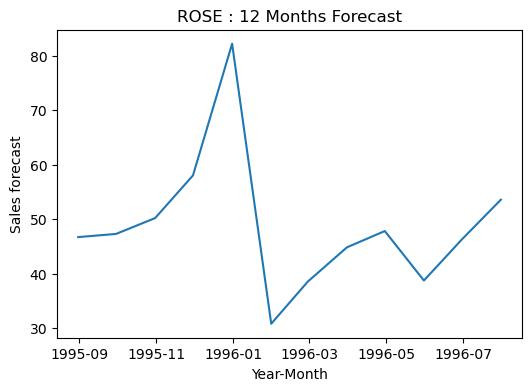

In [160]:
plt.figure(figsize=(6,4))
plt.plot(TES_rose_forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast');

In [163]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = Full_model_TES_rose_fit.forecast(steps=12)

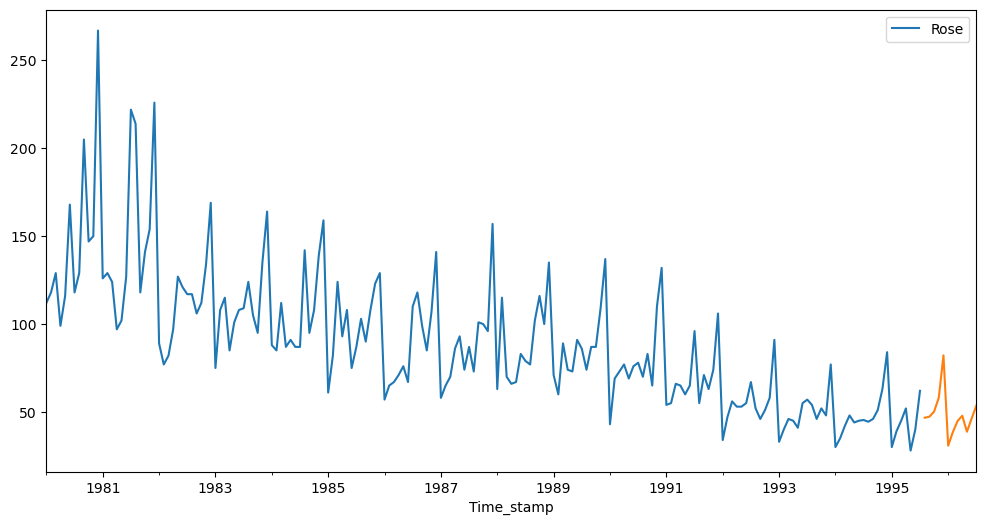

In [164]:
df_rose.plot()
prediction_1.plot();

In [166]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(Full_model_TES_rose_fit.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(Full_model_TES_rose_fit.resid,ddof=1)})
pred_1_df

lower_CI  prediction    upper_ci
1995-08-31  11.579038   46.697791   81.816544
1995-09-30  12.159706   47.278459   82.397212
1995-10-31  15.072439   50.191192   85.309945
1995-11-30  22.910861   58.029614   93.148367
1995-12-31  47.087920   82.206673  117.325426
1996-01-31  -4.327787   30.790966   65.909718
1996-02-29   3.413754   38.532507   73.651260
1996-03-31   9.698853   44.817606   79.936359
1996-04-30  12.689783   47.808536   82.927289
1996-05-31   3.605612   38.724365   73.843118
1996-06-30  11.130475   46.249227   81.367980
1996-07-31  18.450105   53.568858   88.687611

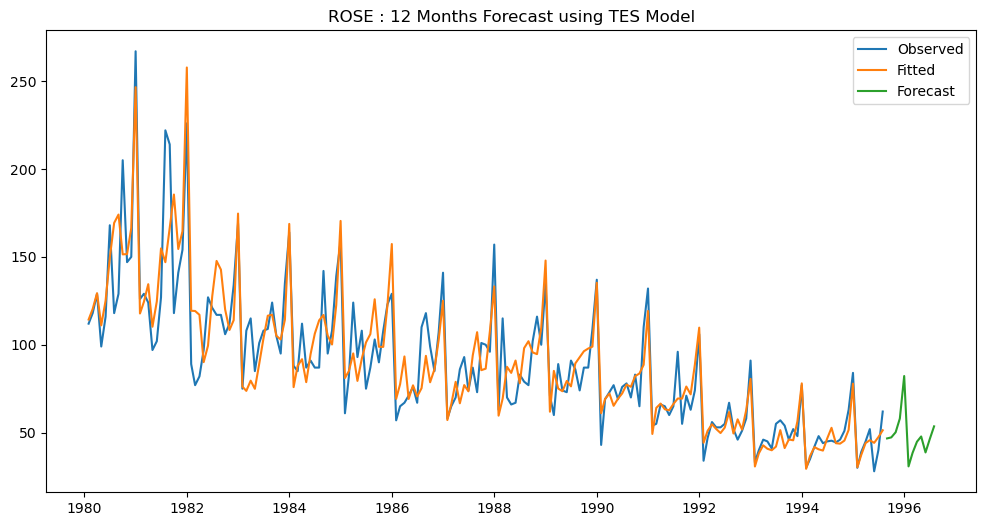

In [167]:
plt.plot(df_rose['Rose'], label='Observed')
plt.plot(Full_model_TES_rose_fit.fittedvalues, label='Fitted')
plt.plot(TES_rose_forecast, label='Forecast')
plt.title('ROSE : 12 Months Forecast using TES Model')
plt.legend(loc='best')
plt.show()

## 1.9- Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [168]:
pred_1_df

lower_CI  prediction    upper_ci
1995-08-31  11.579038   46.697791   81.816544
1995-09-30  12.159706   47.278459   82.397212
1995-10-31  15.072439   50.191192   85.309945
1995-11-30  22.910861   58.029614   93.148367
1995-12-31  47.087920   82.206673  117.325426
1996-01-31  -4.327787   30.790966   65.909718
1996-02-29   3.413754   38.532507   73.651260
1996-03-31   9.698853   44.817606   79.936359
1996-04-30  12.689783   47.808536   82.927289
1996-05-31   3.605612   38.724365   73.843118
1996-06-30  11.130475   46.249227   81.367980
1996-07-31  18.450105   53.568858   88.687611

In [169]:
pred_1_df.describe()

lower_CI  prediction    upper_ci
count  12.000000   12.000000   12.000000
mean   13.622563   48.741316   83.860069
std    12.746394   12.746394   12.746394
min    -4.327787   30.790966   65.909718
25%     8.175543   43.294296   78.413049
50%    11.869372   46.988125   82.106878
75%    15.916856   51.035609   86.154362
max    47.087920   82.206673  117.325426

In [177]:
pred_1_df.sum()

lower_CI       163.470760
prediction     584.895795
upper_ci      1006.320830
dtype: float64

# Sparkling dataset

## 2.1 - Read the data as an appropriate Time Series data and plot the data.

In [3]:
df_spa=pd.read_csv('Sparkling.csv')
df_spa

YearMonth  Sparkling
0     1980-01       1686
1     1980-02       1591
2     1980-03       2304
3     1980-04       1712
4     1980-05       1471
..        ...        ...
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

[187 rows x 2 columns]

### Creating timestamps and adding to Dataframe to make it a time series data


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding timestamp to dataframe
df_spa['Time_stamp']=pd.DataFrame(date)
df_spa

YearMonth  Sparkling Time_stamp
0     1980-01       1686 1980-01-31
1     1980-02       1591 1980-02-29
2     1980-03       2304 1980-03-31
3     1980-04       1712 1980-04-30
4     1980-05       1471 1980-05-31
..        ...        ...        ...
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

[187 rows x 3 columns]

In [6]:
df_spa.set_index('Time_stamp',inplace=True)
df_spa.drop(['YearMonth'],axis=1, inplace=True)
df_spa.head()

Sparkling
Time_stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [7]:
df_spa.dtypes

Sparkling    int64
dtype: object

### Checking for null values

In [8]:
df_spa.isnull().sum()

Sparkling    0
dtype: int64

### Plotting the timeseries data


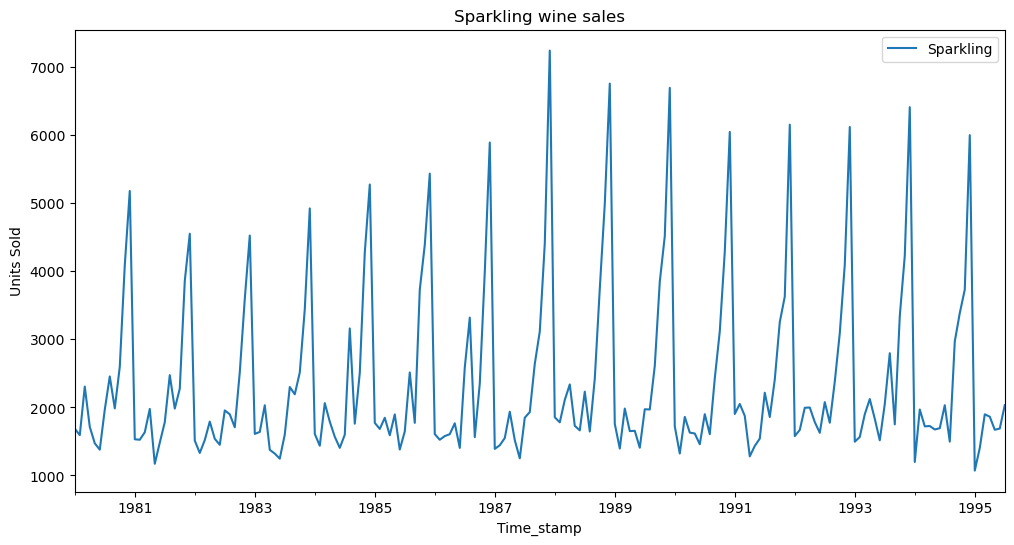

In [9]:
from pylab import rcParams

rcParams['figure.figsize']=12,6
df_spa.plot()
plt.ylabel('Units Sold')
plt.title('Sparkling wine sales')
plt.show()

## 2.2 - Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
df_spa.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

### Yearly Boxplot

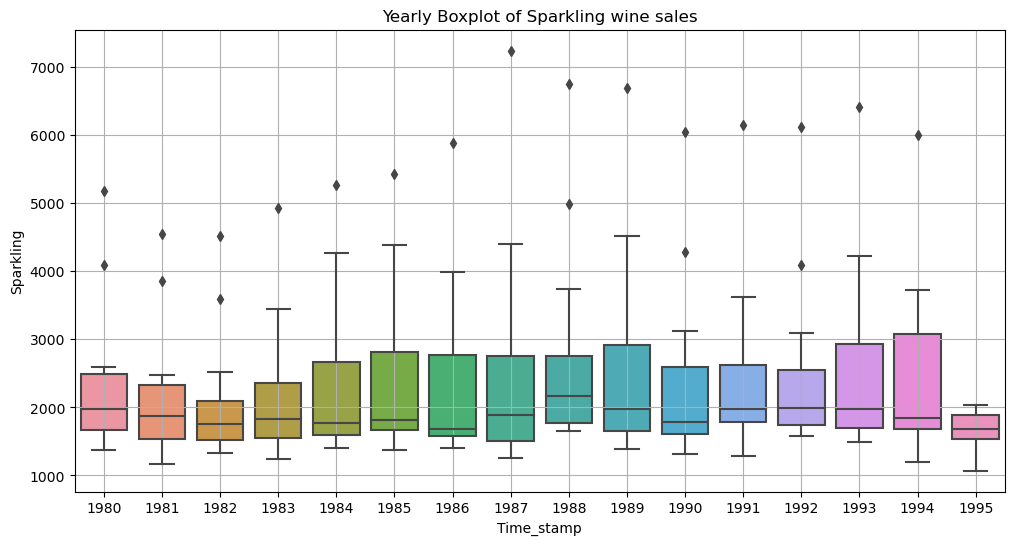

In [11]:
sns.boxplot(x=df_spa.index.year, y=df_spa['Sparkling'] )
plt.title('Yearly Boxplot of Sparkling wine sales')
plt.grid()
plt.show()

### Monthly Boxplot

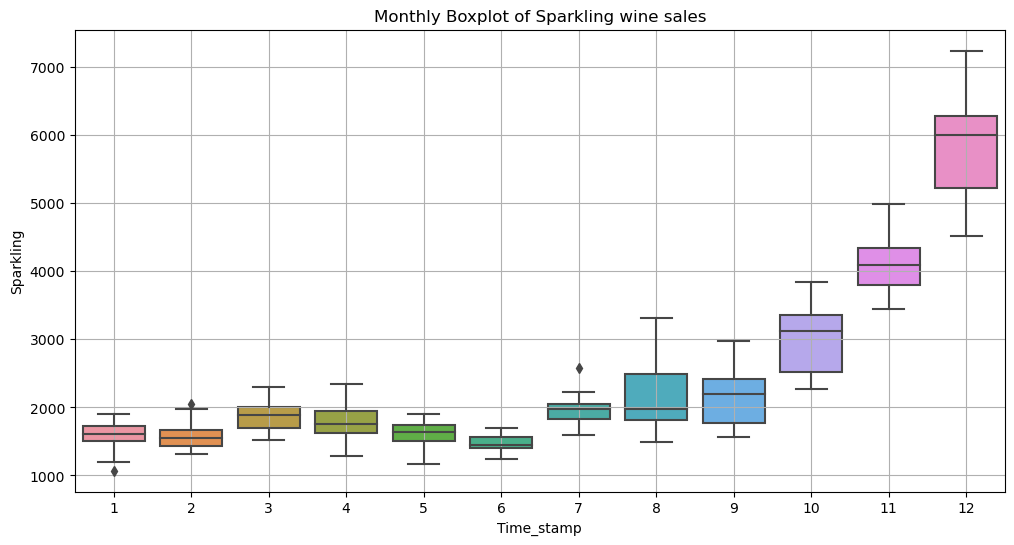

In [12]:
sns.boxplot(x=df_spa.index.month, y=df_spa['Sparkling'] )
plt.title('Monthly Boxplot of Sparkling wine sales')
plt.grid()
plt.show()

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

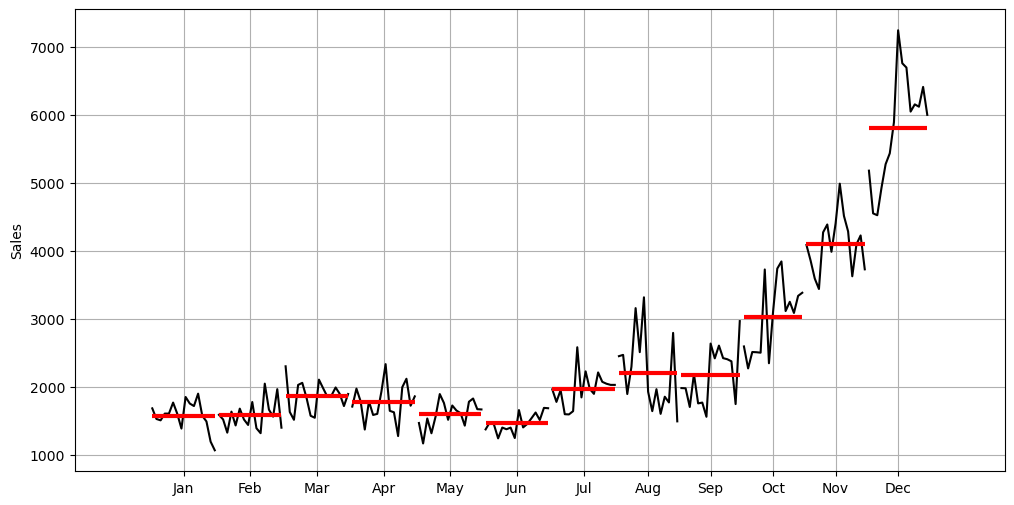

In [13]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_spa['Sparkling'],ylabel='Sales')
plt.grid()

### Plot of montly wine sales across years

In [14]:
monthly_sales_across_years = pd.pivot_table(df_spa, values='Sparkling', columns=df_spa.index.month, index=df_spa.index.year)
monthly_sales_across_years.style.highlight_max()

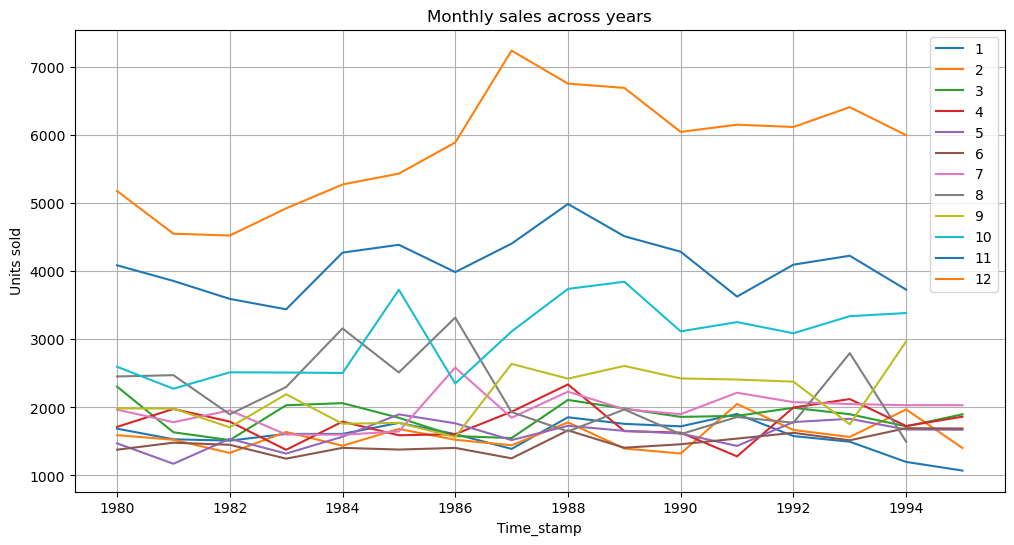

In [15]:
monthly_sales_across_years.plot()
plt.grid()
plt.ylabel('Units sold')
plt.title('Monthly sales across years')
plt.legend(loc='best')

### Plot of average wine sales per month and % change of sales over time¶

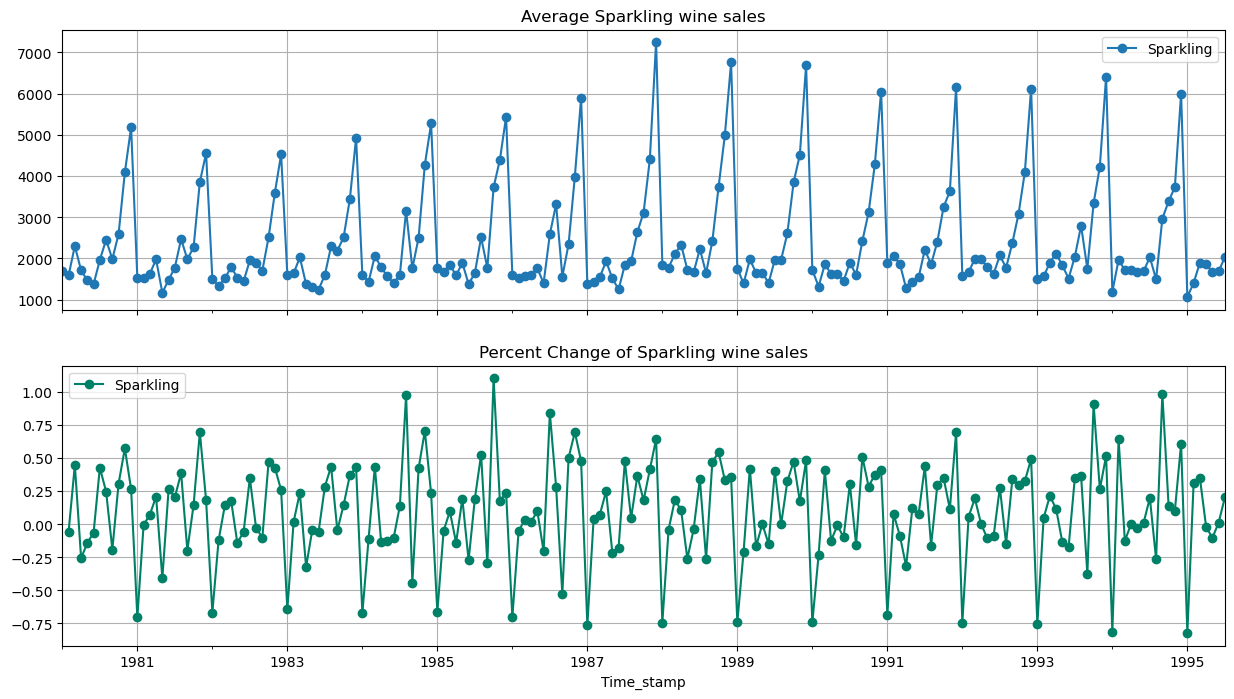

In [16]:
average_spa = df_spa.groupby(df_spa.index)['Sparkling'].mean()
pct_change_spa = df_spa.groupby(df_spa.index)['Sparkling'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rose wine sales over time(year-month)
ax1=average_spa.plot(legend=True, ax=axis1, marker='o', title='Average Sparkling wine sales', grid=True)

# plot precent change for Rose wine Sales over time(year-month)
ax2 = pct_change_spa.plot(legend=True, ax=axis2, marker='o', colormap="summer",title="Percent Change of Sparkling wine sales",grid=True)
plt.legend(loc='best')
plt.show();

### Decompose time series and plot the different components

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

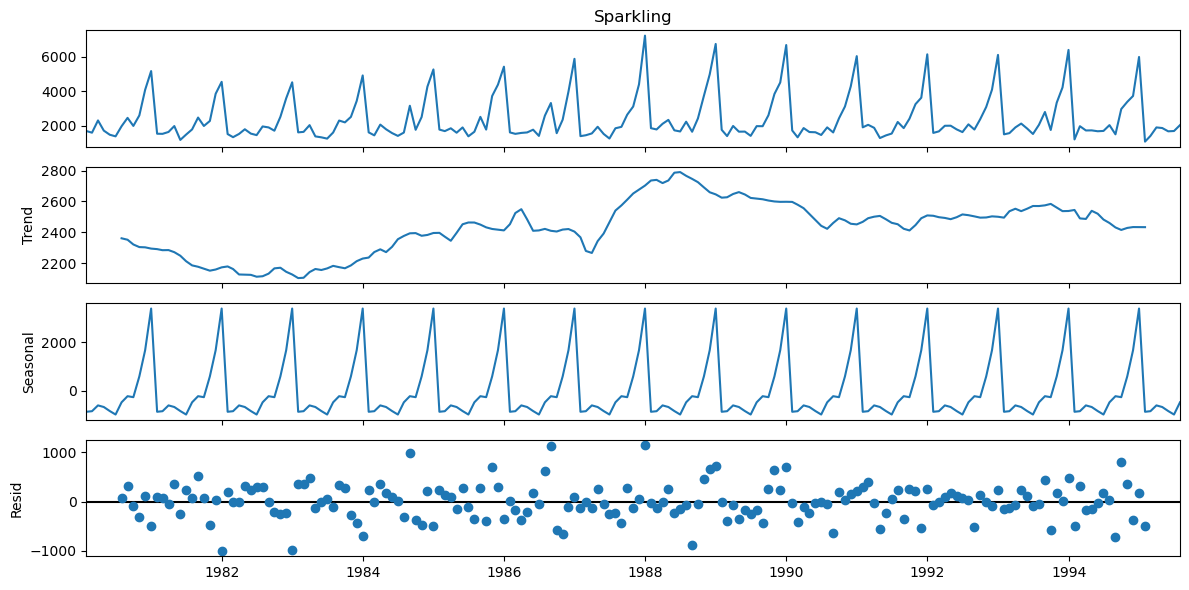

In [18]:
decomposition_add = seasonal_decompose(df_spa['Sparkling'], model='additive')
decomposition_add.plot();

In [19]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

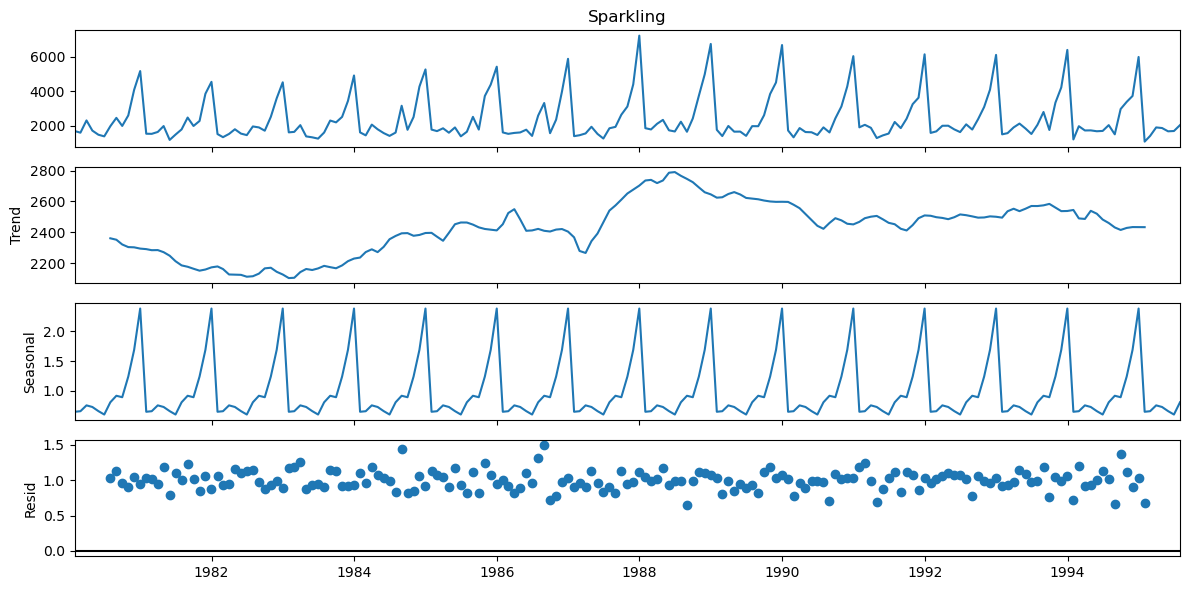

In [20]:
decomposition_mul = seasonal_decompose(df_spa['Sparkling'], model='multiplicative')
decomposition_mul.plot();

In [21]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

## 2.3- Split the data into training and test. The test data should start in 1991.

In [22]:
train = df_spa[df_spa.index.year < 1991]
test = df_spa[df_spa.index.year >= 1991]

In [23]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(train.tail())

First few rows of Training Data


Sparkling
Time_stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [24]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


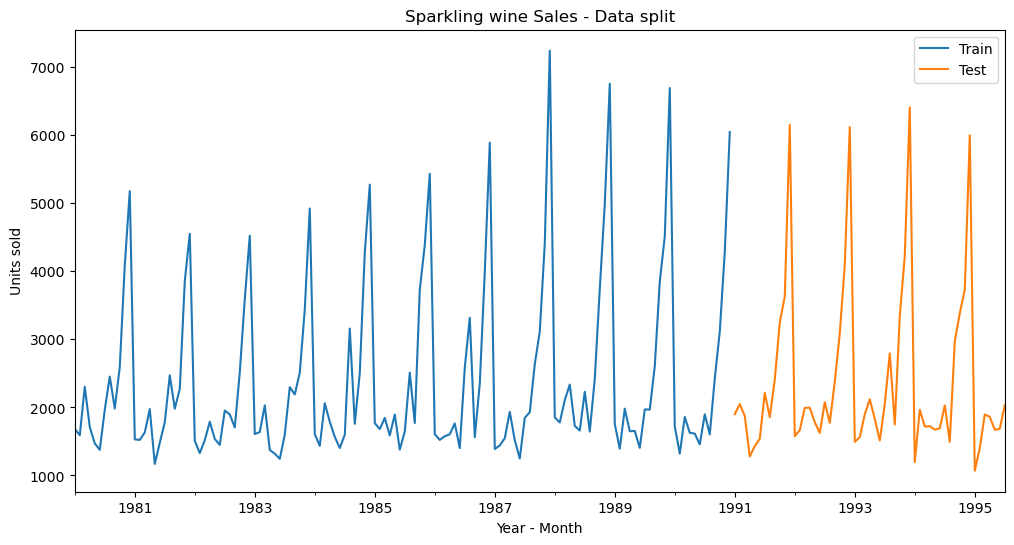

In [25]:
train['Sparkling'].plot(label = 'Train')
test['Sparkling'].plot(label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling wine Sales - Data split')
plt.show;

## 2.4- Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training time instance','\n',train_time)
print('Test time instance','\n',test_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling'].values)

LinearRegression()

In [30]:
test_predict_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOntime'] = test_predict_model1

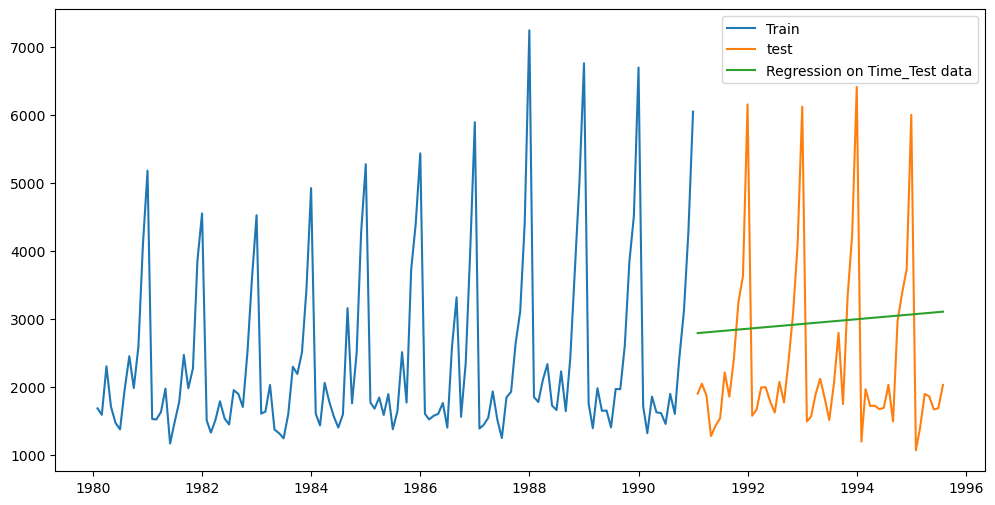

In [31]:
plt.plot(train['Sparkling'],label='Train')
plt.plot(test['Sparkling'],label='test')
plt.plot(LinearRegression_test['RegOntime'], label='Regression on Time_Test data')
plt.legend(loc='best')
plt.show()

In [32]:
# Defining accuracy matrix
from sklearn import metrics

#### Model Evaluation

In [33]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predict_model1, squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [34]:
spa_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
spa_resultsDf

Test RMSE
RegressionOnTime  1389.135175

### Model 2: Naive Method

In [35]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [36]:
NaiveModel_test['Sparkling_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['Sparkling_naive'].head()

Time_stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: Sparkling_naive, dtype: int64

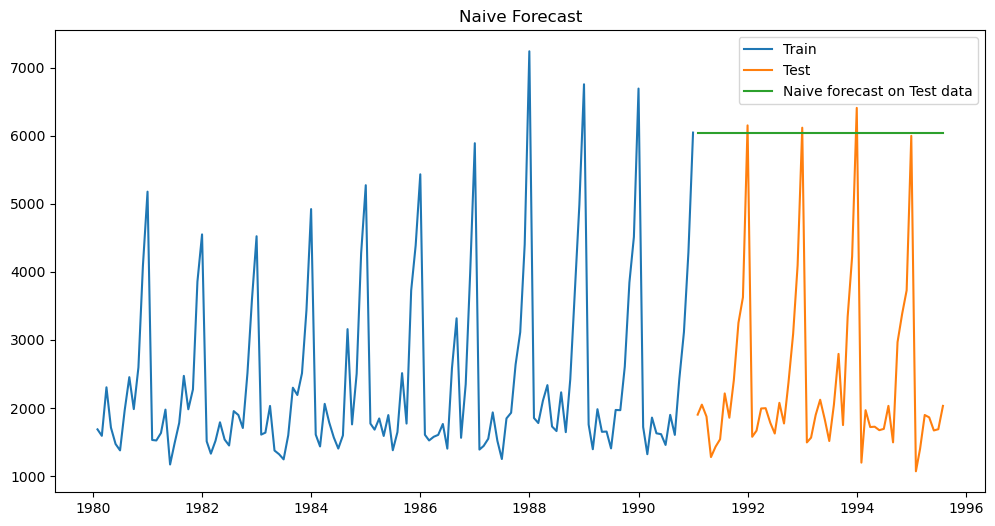

In [37]:
plt.plot(NaiveModel_train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'], label = 'Test')
plt.plot(NaiveModel_test['Sparkling_naive'], label= 'Naive forecast on Test data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

#### Model evaluation

In [38]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['Sparkling_naive'], squared=False)
print("For Naive forecast on Test Data,  RMSE is %3.2f" %(rmse_model2_test))                                              

For Naive forecast on Test Data,  RMSE is 3864.28


In [39]:
spa_resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
spa_resultsDf_2 

Test RMSE
Naive Model  3864.279352

In [40]:
spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_2])
spa_resultsDf

Test RMSE
RegressionOnTime  1389.135175
Naive Model       3864.279352

### Model 3: Simple Average

In [41]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [42]:
SimpleAverage_test['spa_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spa_mean_forecast'].head()

Time_stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spa_mean_forecast, dtype: float64

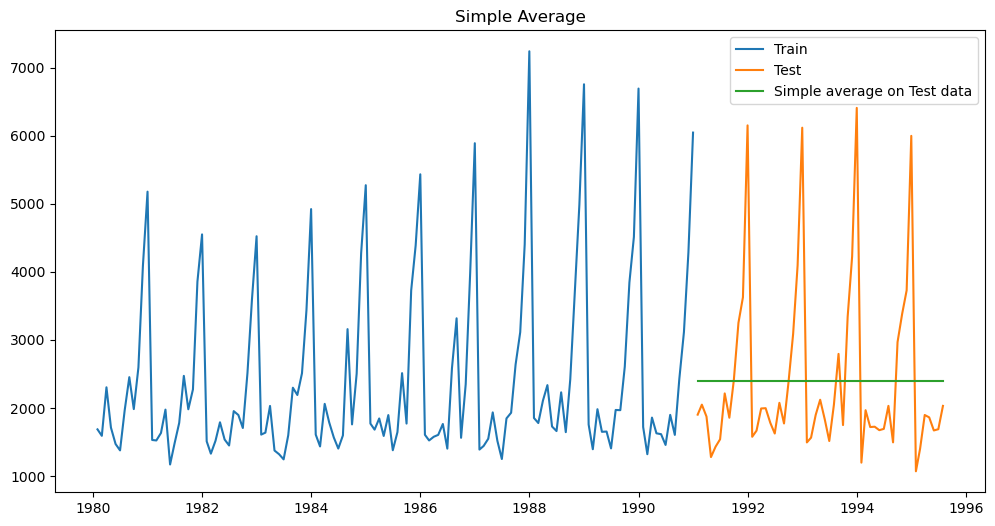

In [43]:
plt.plot(SimpleAverage_train['Sparkling'], label = 'Train')
plt.plot(SimpleAverage_test['Sparkling'], label = 'Test')
plt.plot(SimpleAverage_test['spa_mean_forecast'], label= 'Simple average on Test data')
plt.legend(loc='best')
plt.title('Simple Average')
plt.show()

#### Model evaluation

In [44]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spa_mean_forecast'], squared=False)
print("For Simple average on Test Data,  RMSE is %3.2f" %(rmse_model3_test))                                              

For Simple average on Test Data,  RMSE is 1275.08


In [45]:
spa_resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average model'])
spa_resultsDf_3 

Test RMSE
Simple Average model  1275.081804

In [46]:
spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_3])
spa_resultsDf

Test RMSE
RegressionOnTime      1389.135175
Naive Model           3864.279352
Simple Average model  1275.081804

### Model 4: Moving Average

In [47]:
MovingAverage = df_spa.copy()
MovingAverage.head()

Sparkling
Time_stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [48]:
MovingAverage['spa_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['spa_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['spa_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['spa_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  spa_Trailing_2  spa_Trailing_4  spa_Trailing_6  \
Time_stamp                                                              
1980-01-31       1686             NaN             NaN             NaN   
1980-02-29       1591          1638.5             NaN             NaN   
1980-03-31       2304          1947.5             NaN             NaN   
1980-04-30       1712          2008.0         1823.25             NaN   
1980-05-31       1471          1591.5         1769.50             NaN   

            spa_Trailing_9  
Time_stamp                  
1980-01-31             NaN  
1980-02-29             NaN  
1980-03-31             NaN  
1980-04-30             NaN  
1980-05-31             NaN

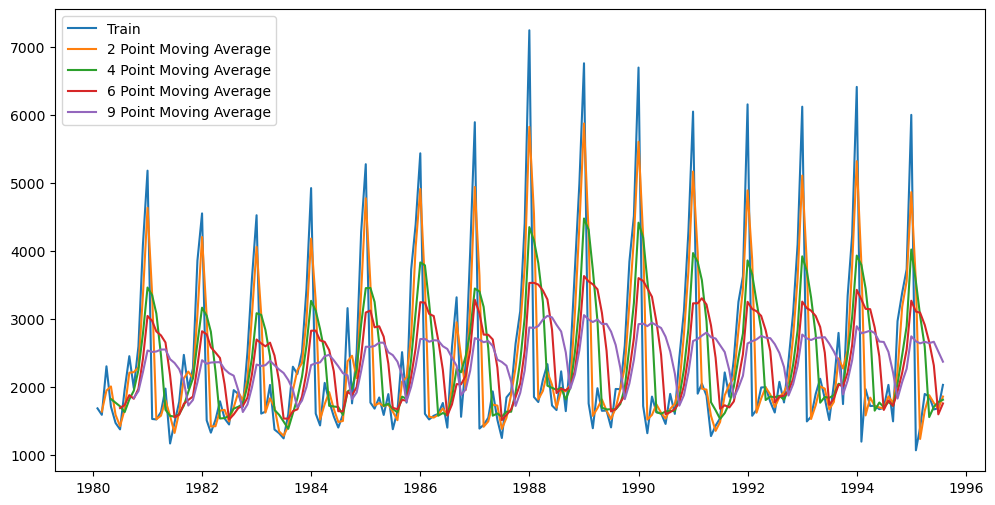

In [49]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['spa_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['spa_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['spa_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['spa_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.show()

In [50]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

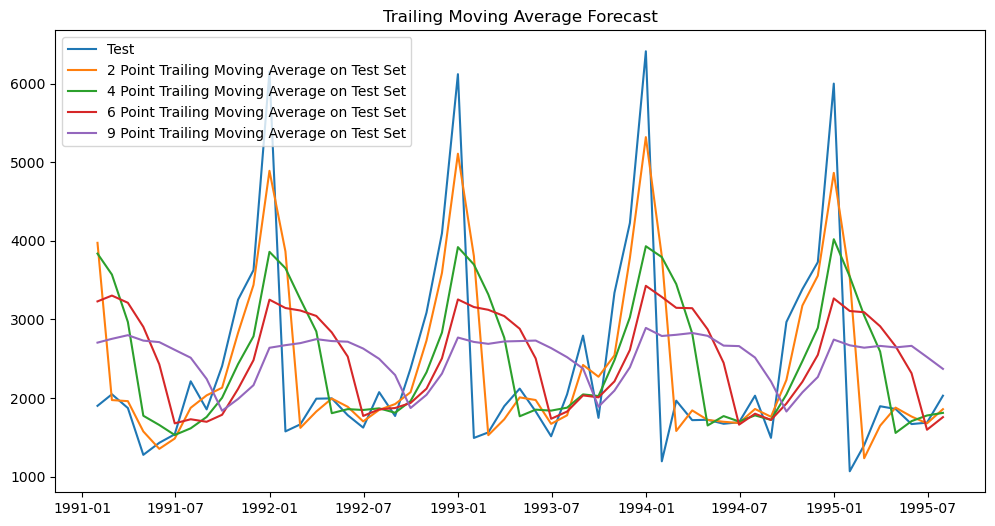

In [51]:
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['spa_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['spa_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['spa_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['spa_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Trailing Moving Average Forecast");

#### Model evaluation

In [52]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['spa_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['spa_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['spa_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['spa_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.2f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.40
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.59
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.93
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.28 


In [53]:
spa_resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA','6 point TMA','9 point TMA'])

spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_4])
spa_resultsDf

Test RMSE
RegressionOnTime      1389.135175
Naive Model           3864.279352
Simple Average model  1275.081804
2 point TMA            813.400684
4 point TMA           1156.589694
6 point TMA           1283.927428
9 point TMA           1346.278315

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

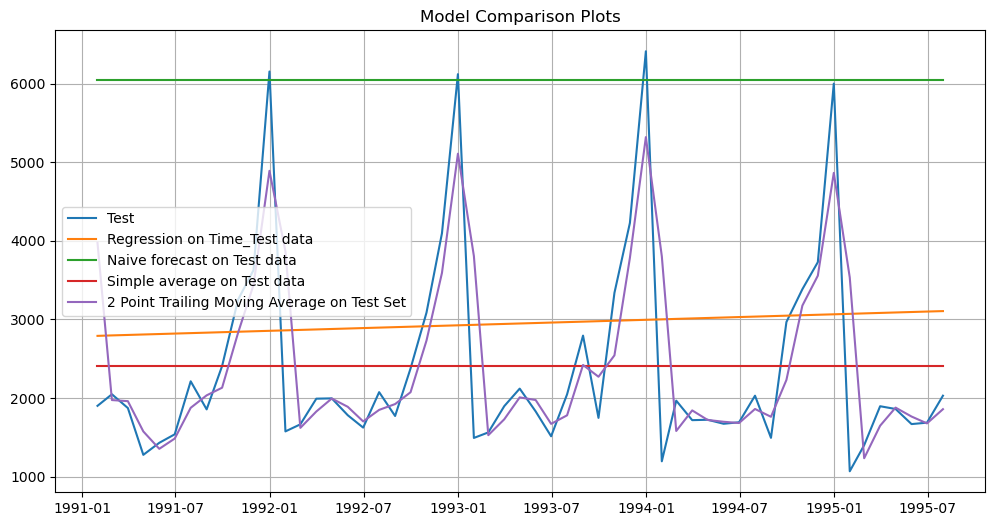

In [54]:
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOntime'], label='Regression on Time_Test data')

plt.plot(NaiveModel_test['Sparkling_naive'], label= 'Naive forecast on Test data')

plt.plot(SimpleAverage_test['spa_mean_forecast'], label= 'Simple average on Test data')

plt.plot(trailing_MovingAverage_test['spa_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [56]:
SES_train = train.copy()
SES_test = test.copy()

In [57]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [58]:
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_test['predict']=model_SES_autofit.forecast(steps = len(test))
SES_test.head()

Sparkling      predict
Time_stamp                        
1991-01-31       1902  2676.676366
1991-02-28       2049  2676.676366
1991-03-31       1874  2676.676366
1991-04-30       1279  2676.676366
1991-05-31       1432  2676.676366

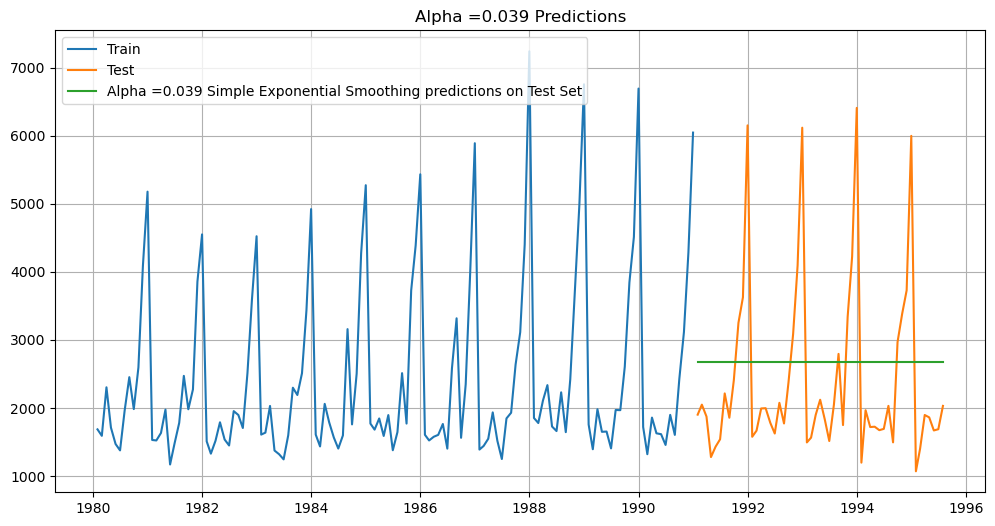

In [61]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.039 Predictions');

#### Model Evaluation for  𝛼 = 0.0496 : Simple Exponential Smoothing

In [62]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [63]:
spa_resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.039 ,SimpleExponentialSmoothing'])

spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_5])
spa_resultsDf

Test RMSE
RegressionOnTime                         1389.135175
Naive Model                              3864.279352
Simple Average model                     1275.081804
2 point TMA                               813.400684
4 point TMA                              1156.589694
6 point TMA                              1283.927428
9 point TMA                              1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing  1304.927405

## Iterative Method for Simple Exponential Smoothing
- Here we will set different alpha values.

In [64]:
spa_resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
spa_resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [65]:
for i in np.arange(0.01, 0.06, 0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Sparkling']))
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    spa_resultsDf_6 = spa_resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

In [66]:
spa_resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1          0.02  1328.406554  1279.495201
0          0.01  1361.997529  1281.032699
2          0.03  1318.846031  1293.110073
3          0.04  1317.138929  1305.462953
4          0.05  1318.429335  1316.411742

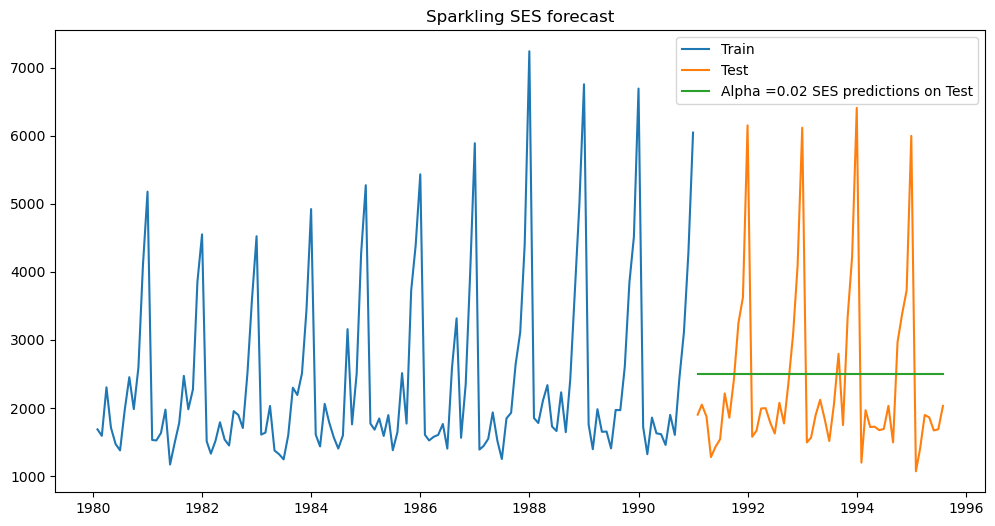

In [67]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 SES predictions on Test')
plt.title('Sparkling SES forecast')
plt.legend(loc='best')
plt.show();

In [68]:
spa_resultsDf_6 = pd.DataFrame({'Test RMSE': [spa_resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,SES_Iterative'])
spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_6])
spa_resultsDf

Test RMSE
RegressionOnTime                         1389.135175
Naive Model                              3864.279352
Simple Average model                     1275.081804
2 point TMA                               813.400684
4 point TMA                              1156.589694
6 point TMA                              1283.927428
9 point TMA                              1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing  1304.927405
Alpha=0.02,SES_Iterative                 1279.495201

### Model 5: Double Exponential Smoothing (Holt's method)

In [69]:
DES_train = train.copy()
DES_test = test.copy()

In [70]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


### Autofit model

In [71]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.6885714285714285
9.999999999999999e-05


In [74]:
DES_test['predict',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))
DES_test.head()

Sparkling  (predict, 0.6885714285714285, 9.999999999999999e-05)
Time_stamp                                                                 
1991-01-31       1902                                        5221.278699   
1991-02-28       2049                                        5127.886554   
1991-03-31       1874                                        5034.494409   
1991-04-30       1279                                        4941.102264   
1991-05-31       1432                                        4847.710119

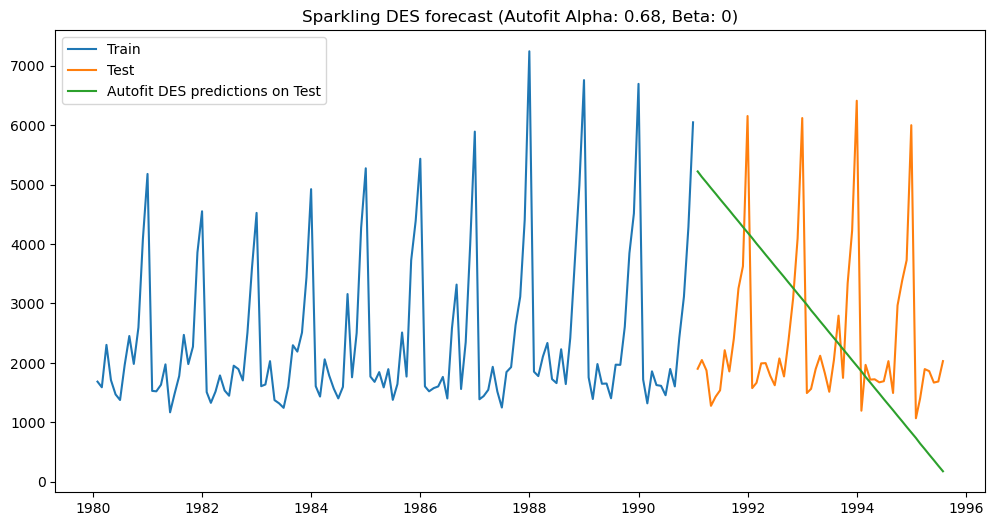

In [75]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict',alpha,beta], label='Autofit DES predictions on Test')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.68, Beta: 0)')
plt.legend(loc='best')
plt.show();

### Model Evaluation for $\alpha$ = 0.68 and $\beta$ = 0.0 : DES-Autofit Model:

In [76]:
rmse_DES = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [77]:
spa_resultsDf_7= pd.DataFrame({'Test RMSE': [rmse_DES]},index=['Alpha=0.68,Beta=0.0, DES Optimized'])

spa_resultsDf = pd.concat([spa_resultsDf, spa_resultsDf_7])
spa_resultsDf

Test RMSE
RegressionOnTime                         1389.135175
Naive Model                              3864.279352
Simple Average model                     1275.081804
2 point TMA                               813.400684
4 point TMA                              1156.589694
6 point TMA                              1283.927428
9 point TMA                              1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing  1304.927405
Alpha=0.02,SES_Iterative                 1279.495201
Alpha=0.68,Beta=0.0, DES Optimized       2007.238526

### Iterative Method for Double Exponential Smoothing

In [78]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [79]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [80]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1     1382.52    1778.56
1            0.1          0.2     1413.60    2599.44
10           0.2          0.1     1418.04    3611.76
2            0.1          0.3     1445.76    4293.08
20           0.3          0.1     1431.17    5908.19

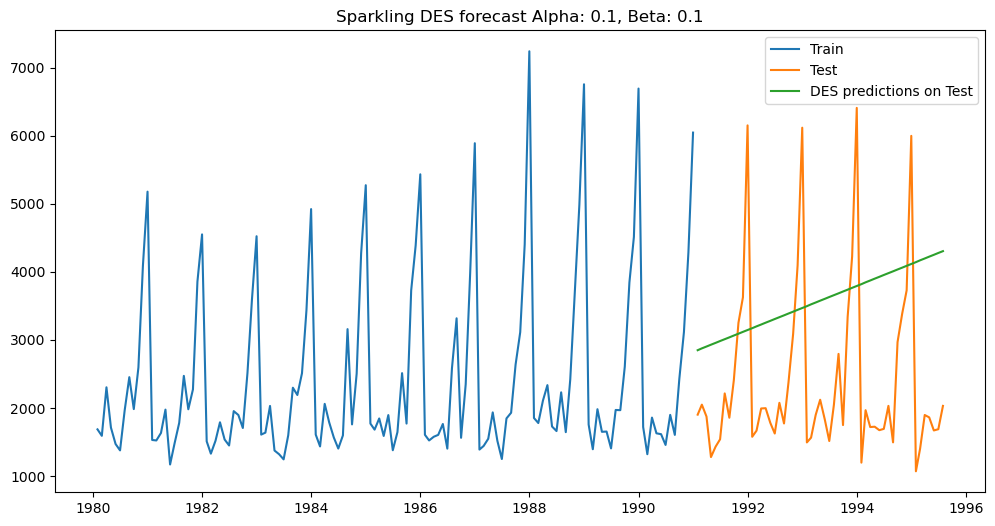

In [81]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='DES predictions on Test')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1')
plt.legend(loc='best')
plt.show();

In [82]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES_Iterative'])

spa_resultsDf = pd.concat([spa_resultsDf, resultsDf_7_1])
spa_resultsDf

Test RMSE
RegressionOnTime                         1389.135175
Naive Model                              3864.279352
Simple Average model                     1275.081804
2 point TMA                               813.400684
4 point TMA                              1156.589694
6 point TMA                              1283.927428
9 point TMA                              1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing  1304.927405
Alpha=0.02,SES_Iterative                 1279.495201
Alpha=0.68,Beta=0.0, DES Optimized       2007.238526
Alpha=0.1,Beta=0.1,DES_Iterative         1778.560000

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [85]:
resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [86]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

In [87]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE  Gamma Values
320           0.5          0.1  396.598057  345.913415           0.3
176           0.3          0.3  397.797318  361.397300           0.3
321           0.5          0.1  405.370169  365.288320           0.4
109           0.2          0.4  513.149439  368.374003           0.8
240           0.4          0.1  382.899740  376.708937           0.3

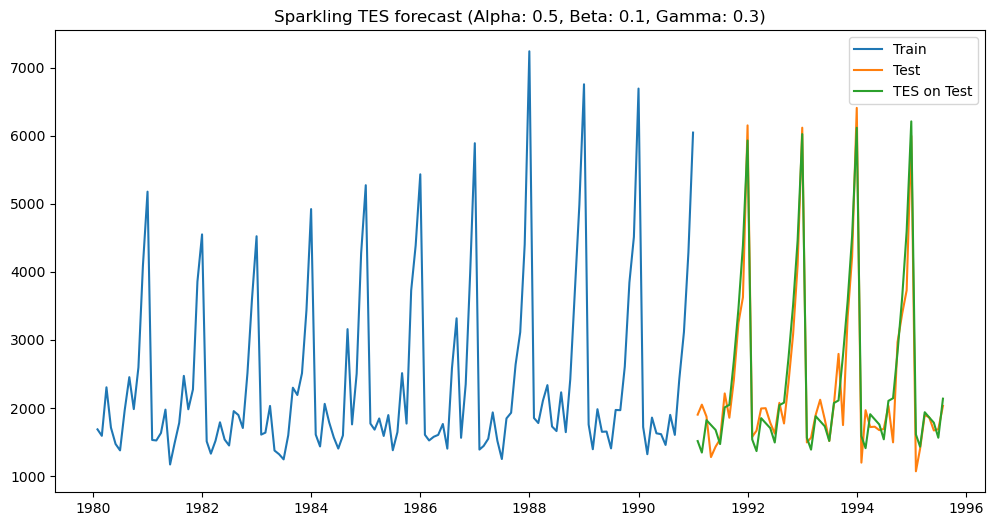

In [88]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict', 0.5, 0.1, 0.3],label='TES on Test')
plt.title('Sparkling TES forecast (Alpha: 0.5, Beta: 0.1, Gamma: 0.3)')
plt.legend(loc='best')
plt.show()

In [89]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative'])

spa_resultsDf = pd.concat([spa_resultsDf, resultsDf_8_1])
spa_resultsDf

Test RMSE
RegressionOnTime                            1389.135175
Naive Model                                 3864.279352
Simple Average model                        1275.081804
2 point TMA                                  813.400684
4 point TMA                                 1156.589694
6 point TMA                                 1283.927428
9 point TMA                                 1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing     1304.927405
Alpha=0.02,SES_Iterative                    1279.495201
Alpha=0.68,Beta=0.0, DES Optimized          2007.238526
Alpha=0.1,Beta=0.1,DES_Iterative            1778.560000
Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative   345.913415

In [90]:
spa_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative   345.913415
2 point TMA                                  813.400684
4 point TMA                                 1156.589694
Simple Average model                        1275.081804
Alpha=0.02,SES_Iterative                    1279.495201
6 point TMA                                 1283.927428
Alpha=0.039 ,SimpleExponentialSmoothing     1304.927405
9 point TMA                                 1346.278315
RegressionOnTime                            1389.135175
Alpha=0.1,Beta=0.1,DES_Iterative            1778.560000
Alpha=0.68,Beta=0.0, DES Optimized          2007.238526
Naive Model                                 3864.279352

## 2.5- Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [91]:
# Dickey-Fuller test to check for stationarity of time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, colour):
    # determining rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='observed')
    mean = plt.plot(rolmean, color='red',label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Result of Dickey-Fuller test: ' )
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

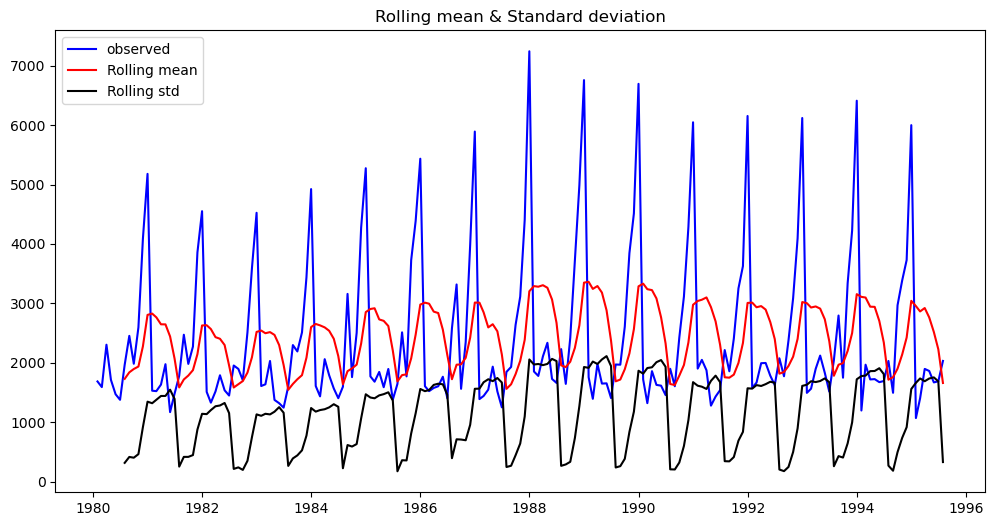

Result of Dickey-Fuller test: 
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [92]:
test_stationarity(df_spa['Sparkling'],'Violet')

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

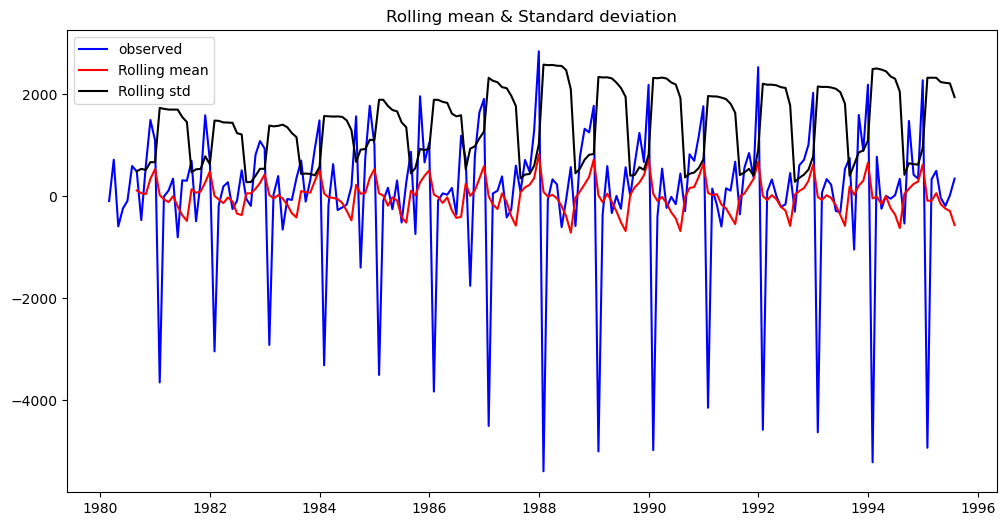

Result of Dickey-Fuller test: 
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [93]:
test_stationarity(df_spa['Sparkling'].diff().dropna(),'Violet')

The time series is now stationary

### Plot the Autocorrelation function plots on the whole data.

### ACF

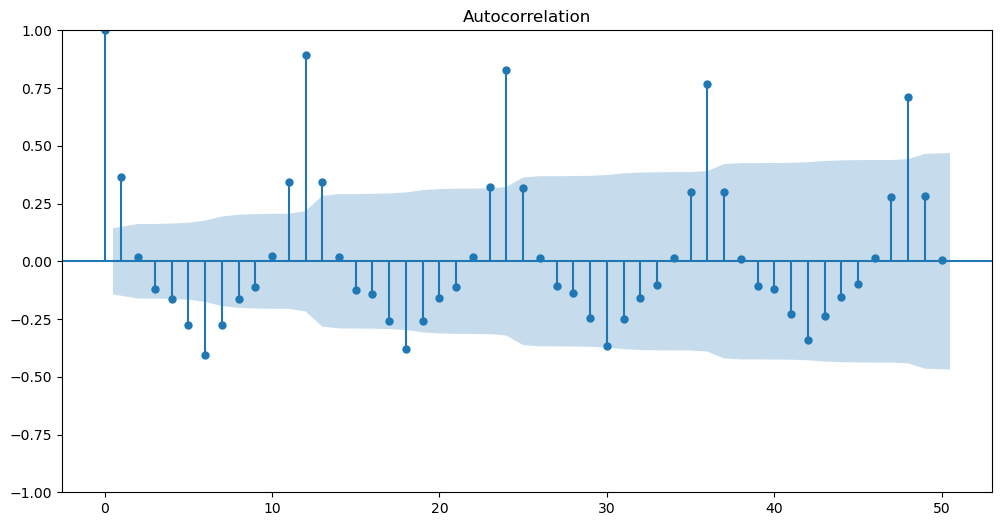

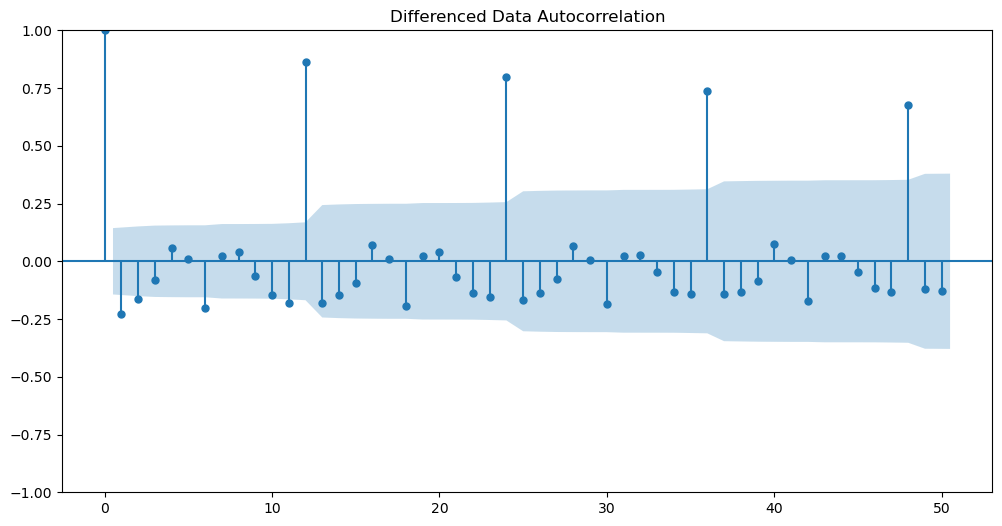

In [128]:
plot_acf(df_spa['Sparkling'],lags=50)
plot_acf(df_spa['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF

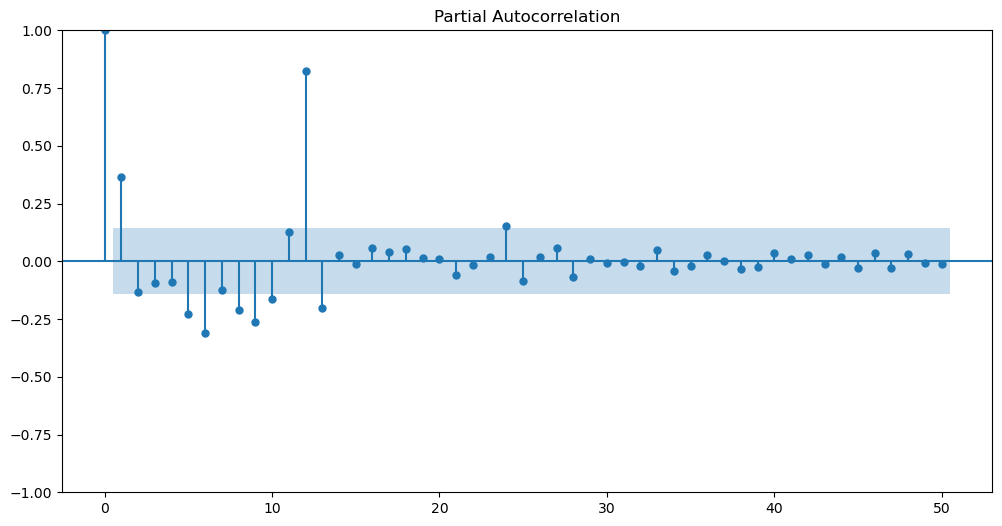

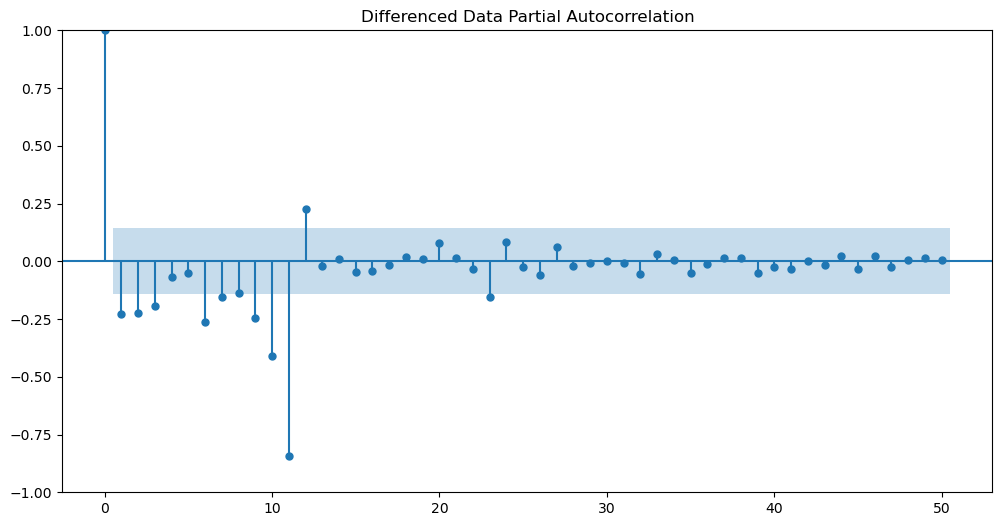

In [279]:
plot_pacf(df_spa['Sparkling'],lags=50)
plot_pacf(df_spa['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

## 2.6- Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [96]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [97]:
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [98]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.527200452102
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.5092123568647


In [99]:
ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [100]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 13 Dec 2023   AIC                           2213.509
Time:                        13:47:15   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

### Predict on the Test Set using this model and evaluate the model.

In [101]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Sparkling']))

In [102]:
rmse_arima_auto_model = metrics.mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 1299.980


In [103]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]},index=['Auto_ARIMA(2, 1, 2)'])

spa_resultsDf = pd.concat([spa_resultsDf, resultsDf_9])
spa_resultsDf

Test RMSE
RegressionOnTime                            1389.135175
Naive Model                                 3864.279352
Simple Average model                        1275.081804
2 point TMA                                  813.400684
4 point TMA                                 1156.589694
6 point TMA                                 1283.927428
9 point TMA                                 1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing     1304.927405
Alpha=0.02,SES_Iterative                    1279.495201
Alpha=0.68,Beta=0.0, DES Optimized          2007.238526
Alpha=0.1,Beta=0.1,DES_Iterative            1778.560000
Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative   345.913415
Auto_ARIMA(2, 1, 2)                         1299.980041

### AUTO SARIMA

In [104]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [105]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [106]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [113]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spa = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_spa.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678888
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.677357425626
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908192392
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621306918
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866629
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155368481
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828557
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923423009
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.1083846680178
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023883
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259196109
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137243
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811159443
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027962992
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.6385888519

In [114]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal          AIC
47   (1, 1, 2)  (0, 1, 2, 12)  1382.347780
128  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
101  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
20   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
131  (1, 1, 2)  (1, 1, 2, 12)  1384.137874

In [115]:
# (1, 1, 2)	(0, 1, 2, 12) AIC=1382.347780
auto_SARIMA_spa = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spa = auto_SARIMA_spa.fit(maxiter=1000)
print(results_auto_SARIMA_spa.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -686.012
Date:                            Wed, 13 Dec 2023   AIC                           1386.024
Time:                                    13:50:38   BIC                           1403.676
Sample:                                         0   HQIC                          1393.148
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8016      0.192     -4.186      0.000      -1.177      -0.426
ma.L2         -0.2427      0.132   

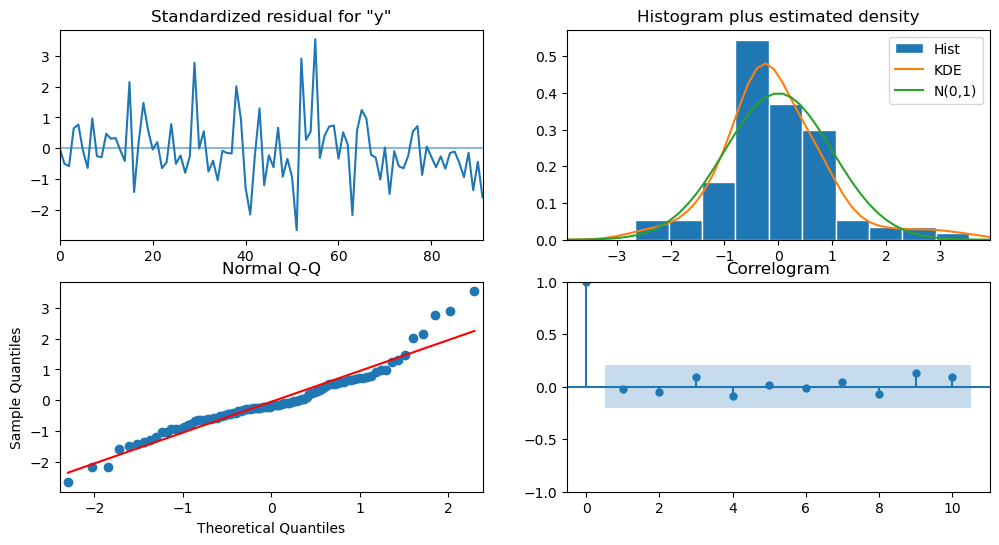

In [116]:
results_auto_SARIMA_spa.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.¶

In [117]:
predicted_auto_SARIMA = results_auto_SARIMA_spa.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [118]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1575.977119  416.793107     759.077640    2392.876599
1  1408.288350  431.609395     562.349482    2254.227219
2  1898.463136  431.977289    1051.803208    2745.123065
3  1745.269764  432.344853     897.889424    2592.650104
4  1632.303072  432.712105     784.202931    2480.403213

In [119]:
# Extract the predicted and true values of our time series
spa_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['sparkling_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  sparkling_forecasted
Time_stamp                                 
1991-01-31       1902           1575.977119
1991-02-28       2049           1408.288350
1991-03-31       1874           1898.463136
1991-04-30       1279           1745.269764
1991-05-31       1432           1632.303072

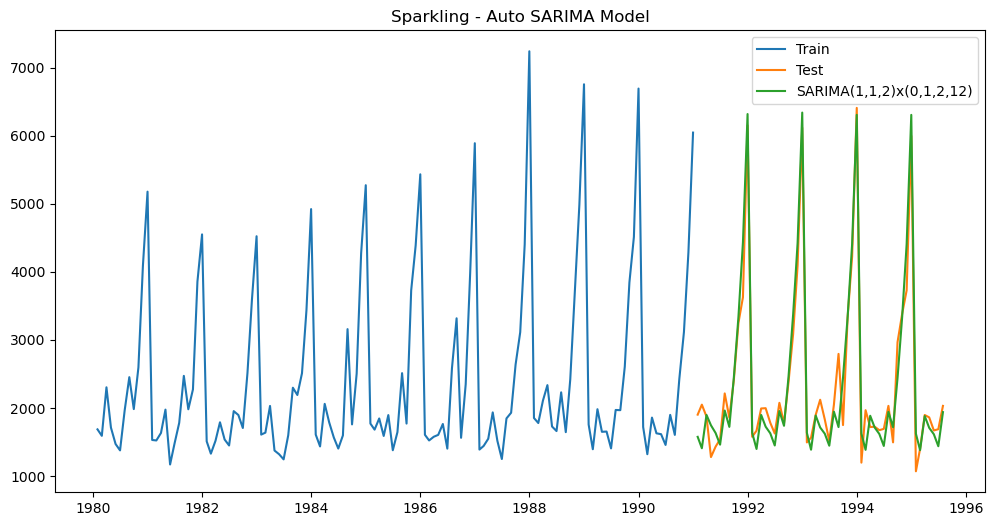

In [120]:
plt.plot(SARIMA_train['Sparkling'], label='Train')
plt.plot(SARIMA_test['Sparkling'], label='Test')
plt.plot(SARIMA_test['sparkling_forecasted'], label='SARIMA(1,1,2)x(0,1,2,12)')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')
plt.show()

In [121]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 327.524


In [122]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]},index=['Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)'])

spa_resultsDf = pd.concat([spa_resultsDf, resultsDf_10])
spa_resultsDf

Test RMSE
RegressionOnTime                            1389.135175
Naive Model                                 3864.279352
Simple Average model                        1275.081804
2 point TMA                                  813.400684
4 point TMA                                 1156.589694
6 point TMA                                 1283.927428
9 point TMA                                 1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing     1304.927405
Alpha=0.02,SES_Iterative                    1279.495201
Alpha=0.68,Beta=0.0, DES Optimized          2007.238526
Alpha=0.1,Beta=0.1,DES_Iterative            1778.560000
Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative   345.913415
Auto_ARIMA(2, 1, 2)                         1299.980041
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)           327.524217

## 2.7- Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [302]:
spa_resultsDf

Test RMSE
RegressionOnTime                            1389.135175
Naive Model                                 3864.279352
Simple Average model                        1275.081804
2 point TMA                                  813.400684
4 point TMA                                 1156.589694
6 point TMA                                 1283.927428
9 point TMA                                 1346.278315
Alpha=0.039 ,SimpleExponentialSmoothing     1304.927405
Alpha=0.02,SES_Iterative                    1279.495201
Alpha=0.68,Beta=0.0, DES Optimized          2007.238526
Alpha=0.1,Beta=0.1,DES_Iterative            1778.560000
Alpha=0.5,Beta=0.1,gamma=0.3,TES_Iterative   345.913415
Auto_ARIMA(2, 1, 2)                         1299.980041
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)           327.524217

## 2.8- Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

i.e-  Alpha=0.5, Beta=0.1, gamma=0.3, TES_Iterative or 2 point TMA

In [123]:
Full_model_TES_spa = ExponentialSmoothing(df_spa['Sparkling'],trend='additive',seasonal='multiplicative')
Full_model_TES_spa_fit = Full_model_TES_spa.fit(smoothing_level=0.5,smoothing_trend=0.1,smoothing_seasonal=0.3,optimized=True,use_brute=True)
TES_spa_forecast = Full_model_TES_spa_fit.forecast(steps=12)

C:\Users\C V S BRAHMMANANDA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [124]:
rmse_spa_tes_full = metrics.mean_squared_error(df_spa['Sparkling'],Full_model_TES_spa_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_spa_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 403.924


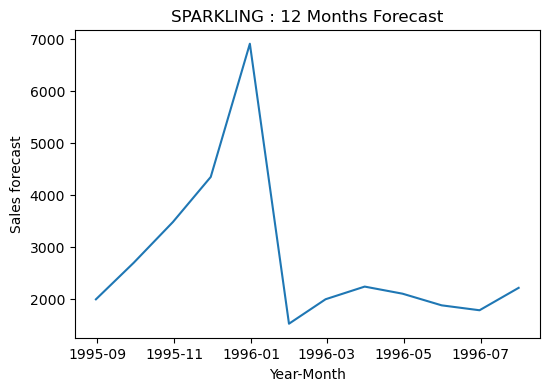

In [125]:
plt.figure(figsize=(6,4))
plt.plot(TES_spa_forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast');

In [306]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = Full_model_TES_spa_fit.forecast(steps=12)

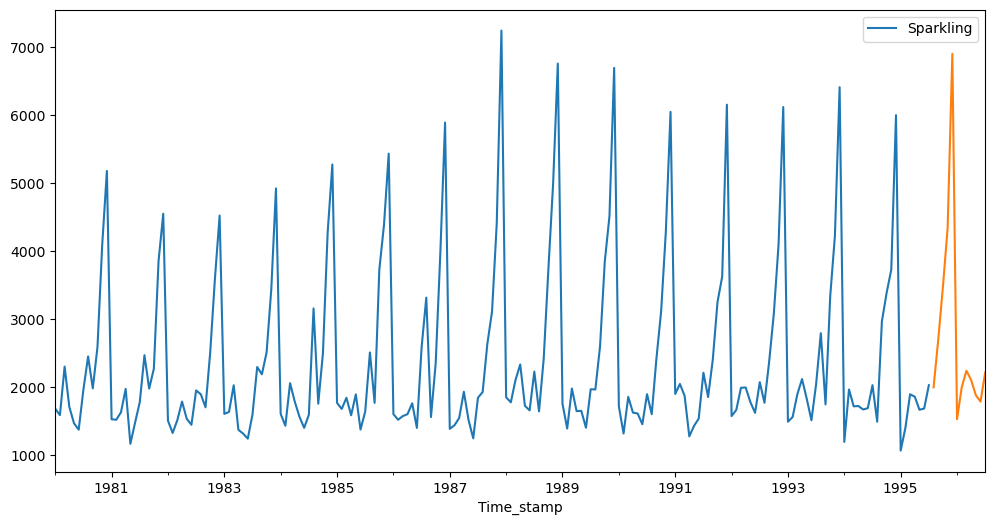

In [307]:
df_spa.plot()
prediction_1.plot();

In [308]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(Full_model_TES_spa_fit.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(Full_model_TES_spa_fit.resid,ddof=1)})
pred_1_df

lower_CI   prediction     upper_ci
1995-08-31  1205.518357  1999.209720  2792.901082
1995-09-30  1907.715655  2701.407018  3495.098380
1995-10-31  2687.412962  3481.104325  4274.795688
1995-11-30  3552.120280  4345.811643  5139.503005
1995-12-31  6106.190745  6899.882108  7693.573471
1996-01-31   737.799229  1531.490592  2325.181955
1996-02-29  1207.022578  2000.713941  2794.405303
1996-03-31  1449.576227  2243.267590  3036.958953
1996-04-30  1313.553559  2107.244922  2900.936285
1996-05-31  1090.275557  1883.966920  2677.658283
1996-06-30   995.954921  1789.646284  2583.337647
1996-07-31  1425.677466  2219.368829  3013.060192

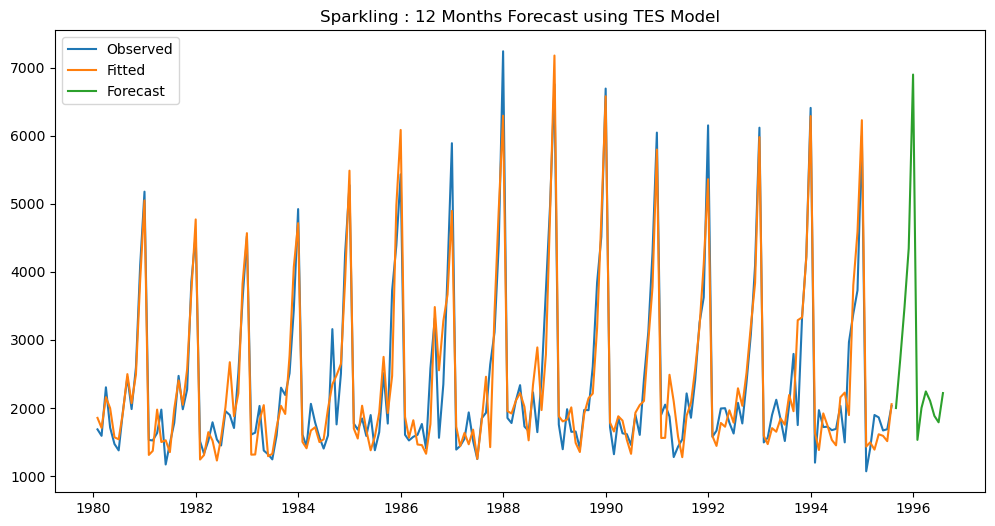

In [309]:
plt.plot(df_spa['Sparkling'], label='Observed')
plt.plot(Full_model_TES_spa_fit.fittedvalues, label='Fitted')
plt.plot(TES_spa_forecast, label='Forecast')
plt.title('Sparkling : 12 Months Forecast using TES Model')
plt.legend(loc='best')
plt.show()

## 2.9 - Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [310]:
pred_1_df

lower_CI   prediction     upper_ci
1995-08-31  1205.518357  1999.209720  2792.901082
1995-09-30  1907.715655  2701.407018  3495.098380
1995-10-31  2687.412962  3481.104325  4274.795688
1995-11-30  3552.120280  4345.811643  5139.503005
1995-12-31  6106.190745  6899.882108  7693.573471
1996-01-31   737.799229  1531.490592  2325.181955
1996-02-29  1207.022578  2000.713941  2794.405303
1996-03-31  1449.576227  2243.267590  3036.958953
1996-04-30  1313.553559  2107.244922  2900.936285
1996-05-31  1090.275557  1883.966920  2677.658283
1996-06-30   995.954921  1789.646284  2583.337647
1996-07-31  1425.677466  2219.368829  3013.060192

In [311]:
pred_1_df.describe()

lower_CI   prediction     upper_ci
count    12.000000    12.000000    12.000000
mean   1973.234795  2766.926157  3560.617520
std    1523.608988  1523.608988  1523.608988
min     737.799229  1531.490592  2325.181955
25%    1176.707657  1970.399020  2764.090382
50%    1369.615513  2163.306875  2956.998238
75%    2102.639982  2896.331345  3690.022707
max    6106.190745  6899.882108  7693.573471

In [312]:
pred_1_df.sum()

lower_CI      23678.817534
prediction    33203.113889
upper_ci      42727.410244
dtype: float64